In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1
You are given a dataset representing the weights and heights of individuals. Your tasks are:
a) Download the dataset from heights_weights.csv 1
. Compute the mean and standard deviation for
both the weight and height columns.
b) Plot histograms of the weights and heights to visualize their distributions.
c) Compute the correlation between height and weight from scratch, without using any library functions
for correlation (use only basic NumPy operations).

## a.)

In [9]:
df = pd.read_csv('HeightWeight.csv')

In [12]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


### Mean of Height and Weight Columns

In [16]:
df.mean()

Index             12500.500000
Height(Inches)       67.993114
Weight(Pounds)      127.079421
dtype: float64

### Standard Deviation of Height and Weight Columns

In [28]:
df.std()

Index             7217.022701
Height(Inches)       1.901679
Weight(Pounds)      11.660898
dtype: float64

C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


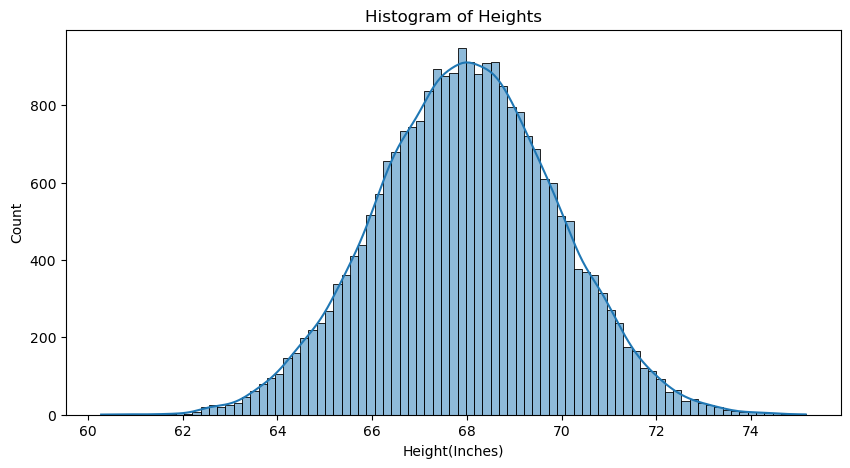

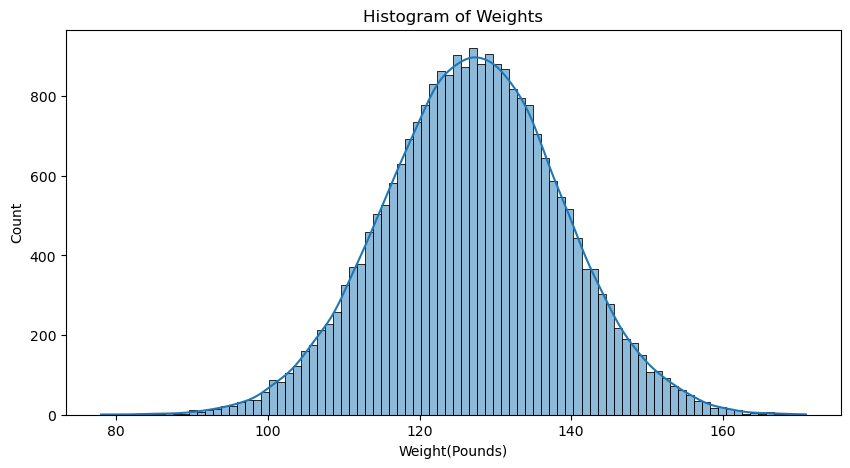

In [30]:
plt.figure(figsize=(10, 5)) 
sns.histplot(x='Height(Inches)', data=df, kde=True)
plt.title('Histogram of Heights')

# Plot histogram for 'Weight(Pounds)'
plt.figure(figsize=(10, 5))
sns.histplot(x='Weight(Pounds)', data=df, kde=True)
plt.title('Histogram of Weights')
plt.show()

### Correlation

In [41]:
df.shape

(25000, 3)

In [42]:
df_np = df.to_numpy()
df_np.shape

(25000, 3)

In [48]:
from numpy import corrcoef

cols = 2
df_float = df_np[:,1:3].astype(float)
df_corr = corrcoef(df_float,rowvar=False)

df_corr

array([[1.        , 0.50285852],
       [0.50285852, 1.        ]])

In [78]:
# Generate random dataset
np.random.seed(42)
num_samples = 1000

# Generate random heights (in cm) with normal distribution
mean_height = 170  # cm
std_dev_height = 10  # cm
heights = np.random.normal(mean_height, std_dev_height, num_samples)

# Generate random weights (in kg) with normal distribution
mean_weight = 70  # kg
std_dev_weight = 15  # kg
weights = np.random.normal(mean_weight, std_dev_weight, num_samples)

# Create DataFrame
data = pd.DataFrame({'Height': heights, 'Weight': weights})

# Compute mean and standard deviation
height_mean = np.mean(heights)
height_std = np.std(heights, ddof=1)  # Using ddof=1 for sample standard deviation

weight_mean = np.mean(weights)
weight_std = np.std(weights, ddof=1)

# Compute correlation from scratch
height_mean_centered = heights - height_mean
weight_mean_centered = weights - weight_mean

numerator = np.sum(height_mean_centered * weight_mean_centered)
denominator = np.sqrt(np.sum(height_mean_centered**2) * np.sum(weight_mean_centered**2))
correlation = numerator / denominator
correlation

-0.04039987129344414

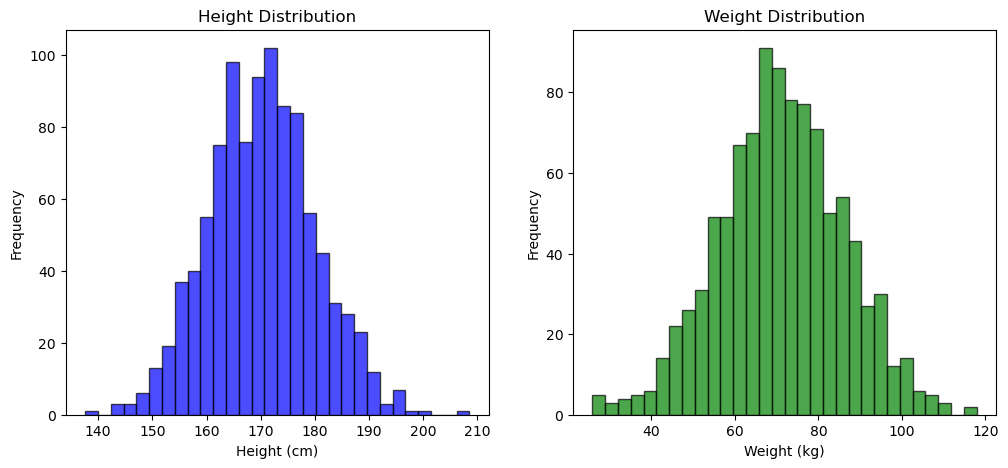

In [80]:
# Display statistics
stats_df = pd.DataFrame({
    "Statistic": ["Mean Height", "Std Dev Height", "Mean Weight", "Std Dev Weight", "Correlation"],
    "Value": [height_mean, height_std, weight_mean, weight_std, correlation]
})

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(heights, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Height Distribution")

plt.subplot(1, 2, 2)
plt.hist(weights, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.title("Weight Distribution")

plt.show()


## b.)
You are given the following dataset representing the growth of bacteria over time:
Time (hours) Bacteria Coun1889.57
a) Fit the following exponential growth model to the data:
(1) y = aebt
where:
• y represents the bacteria count,
• t represents the time (in hours),
• a is the initial bacteria count, which you will determine by fitting the model,
• b is the exponential growth rate, which you will also determine by fit

b) Use nonlinear regression to fit the model to the data, and plot both the data points and the fitted
curve. Compute the coefficient of determination (R
) for the model.
Hint: You may use the curve_fit function from scipy.optimize for nonlinear fitting, which will give you the
values of a and b.ting the model

In [68]:
data = {
    'Time (hours)': [0, 1, 2, 3, 4, 5],
    'Bacteria Count': [100, 180, 324, 583.2, 1049.76, 1889.5]
}

df1 = pd.DataFrame(data)

In [94]:
from scipy.optimize import curve_fit

#Creating the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

X = df1['Time (hours)']
y = df1['Bacteria Count']

In [95]:
#Using the curve_fit module, we can fit into our model and extract the parameters
popt, pcov = curve_fit(exponential_func, X, y)

a, b = popt
print(f"Fitted parameters: a = {a}, b = {b}")

Fitted parameters: a = 100.00566045133118, b = 0.5877687861929192


Text(0.5, 1.0, 'Exponential Fit to Data')

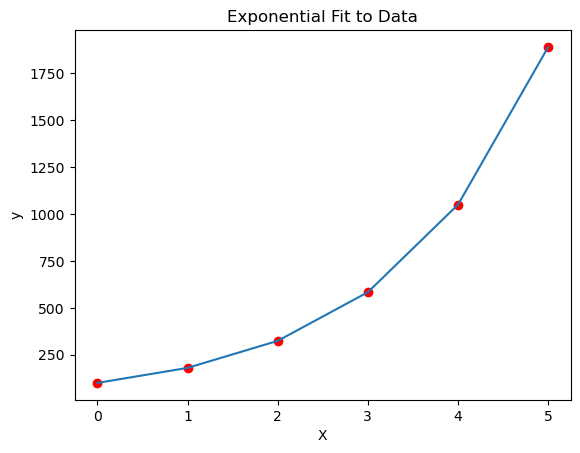

In [102]:
# Plot the original data
plt.plot(X, y, label="Xdata and Ydata")

# Plot the fitted exponential curve
plt.scatter(X, exponential_func(X, *popt), label='Fitted Curve', color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Exponential Fit to Data')

### R2 Calculation

In [113]:
y_pred = exponential_func(X, *popt)

# Calculate R^2
SS_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
SS_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
R2 = 1 - (SS_res / SS_tot)

print(f"Coefficient (a): {popt[0]}")
print(f"Growth Rate (b): {popt[1]}")
print(f"Coefficient of Determination (R²): {R2}")

Coefficient (a): 100.00566045133118
Growth Rate (b): 0.5877687861929192
Coefficient of Determination (R²): 0.9999999998230766


] In this problem, you will create an animated 3D plot of a torus rotating about an axis.
a) The parametric equations of a torus are:
x(u, v) = (R + r cos v) cos u, y(u, v) = (R + r cos v) sin u, z(u, v) = r sin v
where u ∈ [0, 2π], v ∈ [0, 2π], R is the distance from the center of the tube to the center of the torus, and r is
the radius of the tube.
b) Set R = 5 and r = 2. Create a 3D mesh plot of the torus.
c) Create an animation where the torus rotates about the z-axis. The animation should run for 10 seconds and
display the rotating torus.

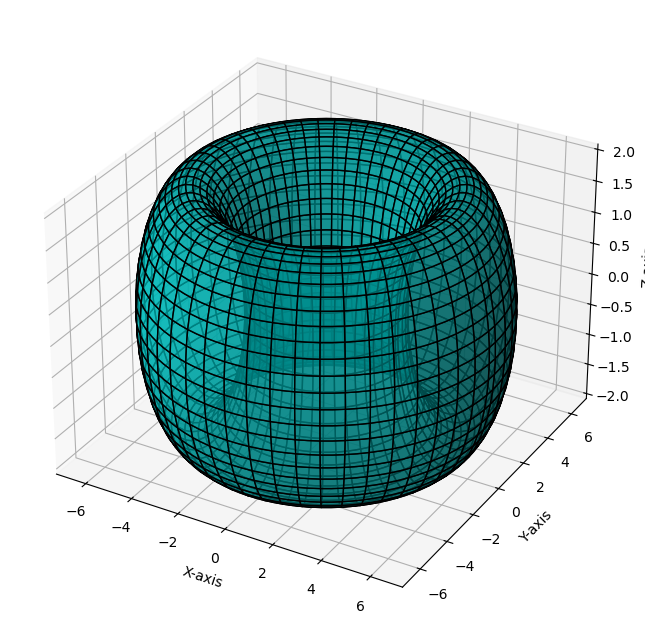

In [81]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Define torus parameters
R = 5  # Distance from center of tube to center of torus
r = 2  # Radius of the tube

# Create mesh grid for parametric equations
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2 * np.pi, 50)
U, V = np.meshgrid(u, v)

# Parametric equations for torus
X = (R + r * np.cos(V)) * np.cos(U)
Y = (R + r * np.cos(V)) * np.sin(U)
Z = r * np.sin(V)

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-R - r, R + r])
ax.set_ylim([-R - r, R + r])
ax.set_zlim([-r, r])
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Plot initial torus
torus_surface = ax.plot_surface(X, Y, Z, color='c', edgecolor='k', alpha=0.7)

# Animation function
def update(frame):
    ax.view_init(elev=30, azim=frame)  # Rotate about z-axis

# Create animation
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 360, 100), interval=100)

# Display animation
plt.show()


# Question 2

### a.) TASK 1

In this task you are required to explore a real-world dataset from the airport dataset named
task1.txt. You are required to the following:
• Load the dataset using pandas and display all necessary information contained in the file
• You are tasked as a data scientist to create a story that is visually appealing from this data. Create
plots using matplotlib/seaborn that will depict such interesting stories from flights that depart
from and arrive in the Austin region. The figures should be annotated properly and also easily
understandable on the first glance. A list of questions that can be explored/answered as reference are
given below. Of course, you are free to explore any other possibilities.
– Investigate what time of the day it is best to fly so as to have the least possible delays. Does this
change with airlines?
– Investigate what time of the year it is more suited to fly so as to have the delays minimum and
does the destination affect this? You can lay insights on some popular destinations for the task.
– Explore some airports that are bad to fly to. Does the time of day or year affect this?
– Investigate on how the pattern of flights to various destinations alter over the course of year

In [83]:
df = pd.read_csv('task1.txt')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,1,2,120.0,1935,309.0,2130,9E,5746,...,3.0,18.0,0,NaN,0,339.0,0.0,0.0,0.0,0.0
1,2008,1,1,2,555.0,600,826.0,835,AA,1614,...,7.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,1,2,600.0,600,728.0,729,YV,2883,...,7.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,1,2,601.0,605,727.0,750,9E,5743,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,1,2,601.0,600,654.0,700,AA,1157,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [115]:
df2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### What time of the day it is best to fly so as to have the least possible delays?

In [162]:
new_df = df2[['Month','DepTime','ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance']]

new_df

,Month,DepTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,120.0,339.0,345.0,MEM,AUS,559
1,1,555.0,-9.0,-5.0,AUS,ORD,978
2,1,600.0,-1.0,0.0,AUS,PHX,872
3,1,601.0,-23.0,-4.0,AUS,MEM,559
4,1,601.0,-6.0,1.0,AUS,DFW,190
...,...,...,...,...,...,...,...
99255,12,2109.0,1.0,9.0,IAH,AUS,140
99256,12,2124.0,-14.0,1.0,ATL,AUS,813
99257,12,2327.0,-11.0,2.0,DFW,AUS,190
99258,12,NaN,NaN,NaN,AUS,BOS,1698


##### We would then drop all NaN values/rows

In [143]:
new_df.dropna(axis=0,inplace=True)

C:\Users\tegbe\AppData\Local\Temp\ipykernel_13988\4151371568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(axis=0,inplace=True)


In [163]:
new_df

,Month,DepTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,120.0,339.0,345.0,MEM,AUS,559
1,1,555.0,-9.0,-5.0,AUS,ORD,978
2,1,600.0,-1.0,0.0,AUS,PHX,872
3,1,601.0,-23.0,-4.0,AUS,MEM,559
4,1,601.0,-6.0,1.0,AUS,DFW,190
...,...,...,...,...,...,...,...
99255,12,2109.0,1.0,9.0,IAH,AUS,140
99256,12,2124.0,-14.0,1.0,ATL,AUS,813
99257,12,2327.0,-11.0,2.0,DFW,AUS,190
99258,12,NaN,NaN,NaN,AUS,BOS,1698


In [179]:
high_delays_g = new_df.groupby('DepTime')['DepDelay'].sum().reset_index()
high_delays_g

,DepTime,DepDelay
0,1.0,683.0
1,2.0,129.0
2,3.0,249.0
3,4.0,1029.0
4,5.0,155.0
...,...,...
1203,2356.0,76.0
1204,2357.0,547.0
1205,2358.0,744.0
1206,2359.0,74.0


In [228]:
high_delays = high_delays_g[high_delays_g['DepDelay']<-405]
high_delays.sort_values('DepDelay',ascending=True,inplace=True)
high_delays

C:\Users\tegbe\AppData\Local\Temp\ipykernel_13988\1390945243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_delays.sort_values('DepDelay',ascending=True,inplace=True)


,DepTime,DepDelay
177,650.0,-852.0
182,655.0,-804.0
183,656.0,-766.0
122,555.0,-747.0
123,556.0,-504.0
121,554.0,-490.0
184,657.0,-480.0
120,553.0,-475.0
152,625.0,-470.0
127,600.0,-441.0


### The time with the -852 DepDelay is the best time to fly which is 650.0 Departure Time

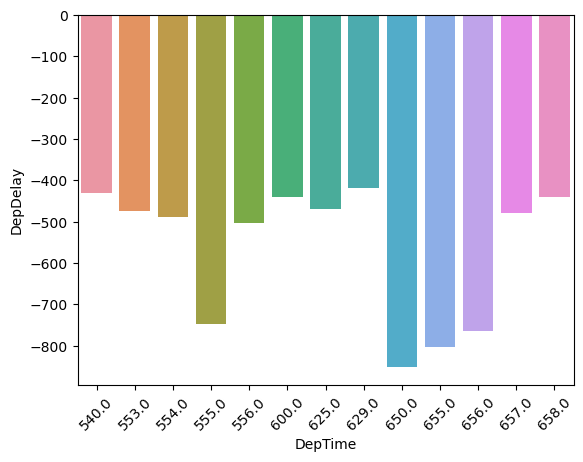

In [231]:
sns.barplot(x=high_delays['DepTime'],y=high_delays['DepDelay'])
plt.xticks(rotation=45)
plt.show()

### What time of the year it is more suited to fly so as to have the delays minimum and does the destination affect this?

In [232]:
new_df

,Month,DepTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,120.0,339.0,345.0,MEM,AUS,559
1,1,555.0,-9.0,-5.0,AUS,ORD,978
2,1,600.0,-1.0,0.0,AUS,PHX,872
3,1,601.0,-23.0,-4.0,AUS,MEM,559
4,1,601.0,-6.0,1.0,AUS,DFW,190
...,...,...,...,...,...,...,...
99255,12,2109.0,1.0,9.0,IAH,AUS,140
99256,12,2124.0,-14.0,1.0,ATL,AUS,813
99257,12,2327.0,-11.0,2.0,DFW,AUS,190
99258,12,NaN,NaN,NaN,AUS,BOS,1698


In [294]:
y_delays = new_df.groupby('Month')['DepDelay'].mean().reset_index()
y_delays

,Month,DepDelay
0,1,8.371216
1,2,10.308328
2,3,13.253937
3,4,8.174785
4,5,8.852347
5,6,12.232877
6,7,10.231535
7,8,10.257626
8,9,3.327223
9,10,3.877845


<Axes: xlabel='Month', ylabel='DepDelay'>

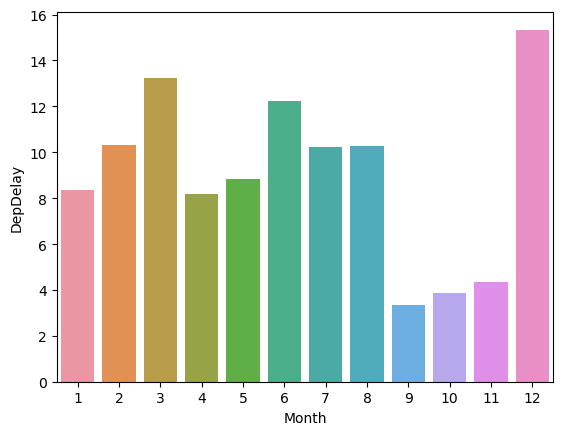

In [295]:
sns.barplot(x=y_delays['Month'],y=y_delays['DepDelay'])

#### September is the best time of the month as it has the less number of delays

In [247]:
dest = new_df.groupby(['Month', 'Dest'])['DepDelay'].sum().reset_index()
dest

,Month,Dest,DepDelay
0,1,ABQ,389.0
1,1,ATL,1650.0
2,1,AUS,45299.0
3,1,BNA,357.0
4,1,BOS,186.0
...,...,...,...
502,12,SAN,596.0
503,12,SFO,1141.0
504,12,SJC,140.0
505,12,SLC,125.0


In [260]:
### Getting the destinations with less delays in September

sept = dest[dest['Month'] == 9]
sept['Dest'].value_counts()

Dest
ABQ    1
ORD    1
LBB    1
LGB    1
MAF    1
MCO    1
MDW    1
MEM    1
MSY    1
OAK    1
PHL    1
ATL    1
PHX    1
RDU    1
SAN    1
SEA    1
SFO    1
SJC    1
SLC    1
SNA    1
LAX    1
LAS    1
JFK    1
IND    1
AUS    1
BNA    1
BOS    1
BWI    1
CLE    1
CLT    1
CVG    1
DAL    1
DEN    1
DFW    1
ELP    1
EWR    1
FLL    1
HOU    1
HRL    1
IAD    1
IAH    1
TPA    1
Name: count, dtype: int64

In [255]:
# Getting the destinations with less delays throughout the whole year

dest_g = dest[dest['DepDelay']<-10]
dest_g['Dest'].value_counts()

Dest
SNA    5
IND    4
SLC    4
MEM    4
CLT    4
SJC    4
DFW    3
TUS    3
SFO    3
BOS    2
MCI    2
JAX    2
TUL    2
STL    2
MSY    1
LGB    1
CVG    1
MDW    1
MCO    1
IAH    1
FLL    1
DEN    1
CLE    1
ATL    1
SEA    1
MAF    1
MSP    1
ABQ    1
IAD    1
Name: count, dtype: int64

#### As we can see from above SNA, IND, SLC, MEM are the destinations with less delays however they are not so present in September
#### Therefore the destination doesn't affect the time of the year with minimum delays

### Investigate on how the pattern of flights to various destinations alter over the course of year

In [287]:
month = new_df.groupby(['Month', 'Dest']).size().reset_index(name='Count')
month

,Month,Dest,Count
0,1,ABQ,58
1,1,ATL,210
2,1,AUS,4365
3,1,BNA,82
4,1,BOS,31
...,...,...,...
502,12,SAN,62
503,12,SFO,62
504,12,SJC,77
505,12,SLC,31


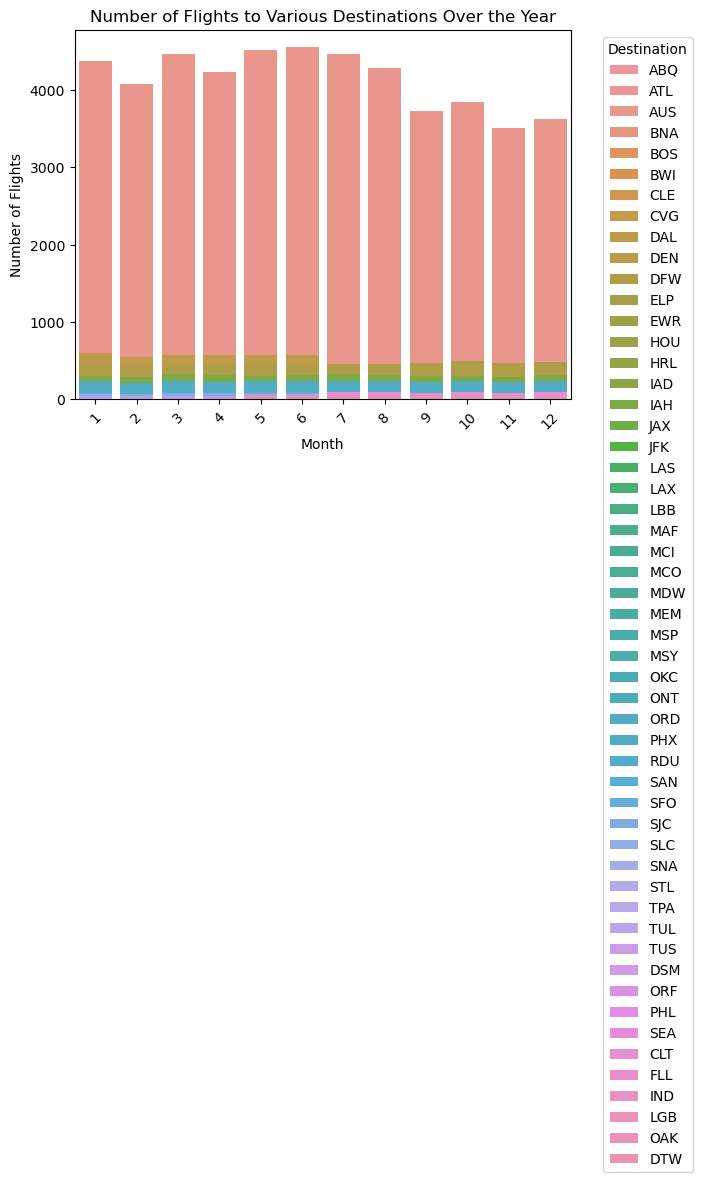

In [307]:

sns.barplot(x=month['Month'], y=month['Count'],hue=month['Dest'],dodge=False)
plt.title('Number of Flights to Various Destinations Over the Year')
plt.ylabel('Number of Flights')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [85]:
### good solu
#Firstly We will try to answer the timeframe of which the data is available  
print('The year of the flights is',df['Year'].unique())
#Now the months
print('The months of the flights are',df['Month'].unique())
#Now the days
print('The days of the flights are',df['DayofMonth'].unique())
## let's check how many unique airlines are there
df['UniqueCarrier'].nunique()

The year of the flights is [2008]
The months of the flights are [ 1  2  3  4  5  6  7  8  9 10 11 12]
The days of the flights are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


16

Currently, our year, month and date columns are different, in order to have nice visualizations, it is better to have them combined in one column too. For this purpose, we are going to write a function that combines year, month, and date togather.

In [86]:
#function to join the date combining the year month and day
def make_date(cols):
    year = cols[0]
    month = cols[1]
    day = cols[2]
    return str(year)+'-'+str(month)+'-'+str(day)
df['date'] = pd.to_datetime(df[['Year','Month','DayofMonth']].apply(make_date,axis=1))

C:\Users\tegbe\AppData\Local\Temp\ipykernel_3852\1215140143.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year = cols[0]
C:\Users\tegbe\AppData\Local\Temp\ipykernel_3852\1215140143.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  month = cols[1]
C:\Users\tegbe\AppData\Local\Temp\ipykernel_3852\1215140143.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  day = cols[2]


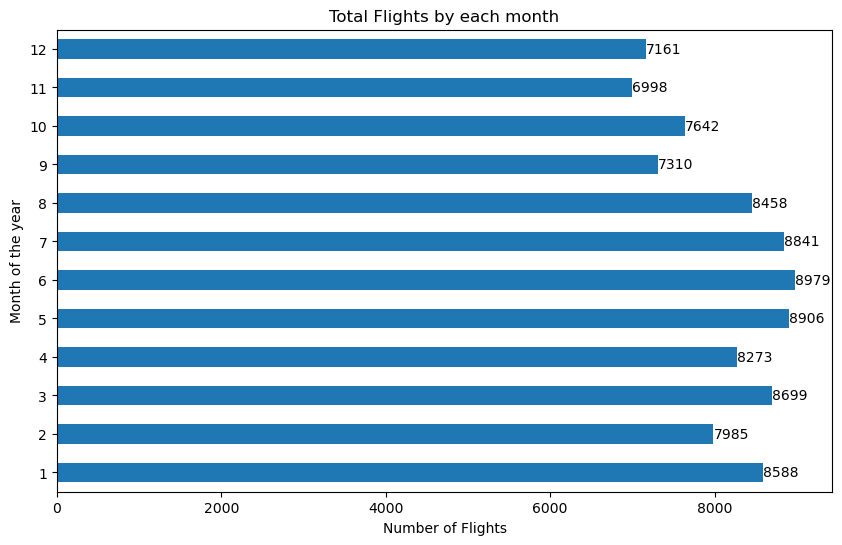

In [88]:
dfcc = df[df['Cancelled'] == 0].copy() # to filter out cancelled flights
plt.figure(figsize=(10,6))
ax = dfcc.groupby('Month').count()['Year'].plot(kind='barh')
ax.bar_label(ax.containers[0]);
plt.title('Total Flights by each month');
plt.xlabel('Number of Flights');
plt.ylabel('Month of the year');

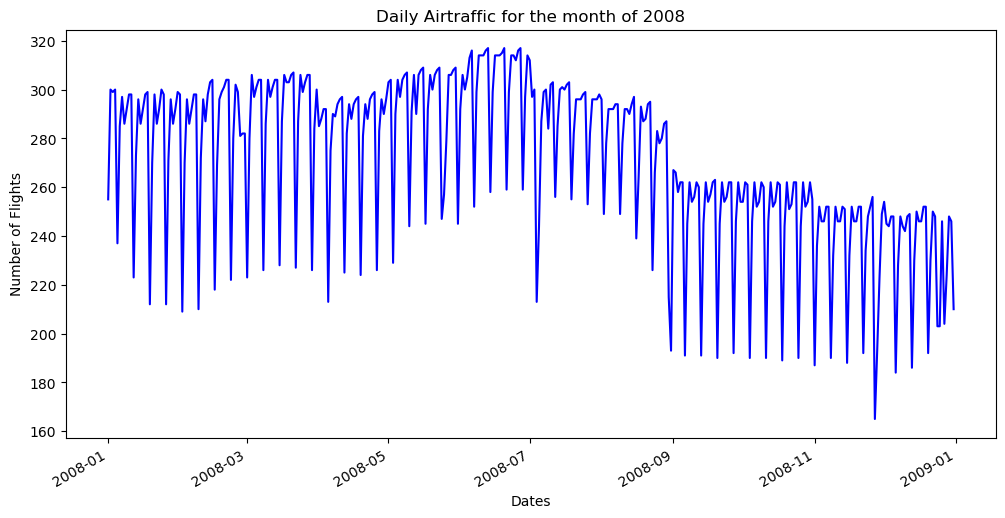

In [90]:
dfm = df.groupby('date').count()['Year']
plt.figure(figsize=(12,6))
plt.title('Daily Airtraffic for the month of 2008')
plt.xlabel('Dates')
plt.ylabel('Number of Flights')
plt.plot(dfm.index,dfm.values,color='blue')

plt.gcf().autofmt_xdate()

Let's also answer if the airtraffic is influenced by the day of the month

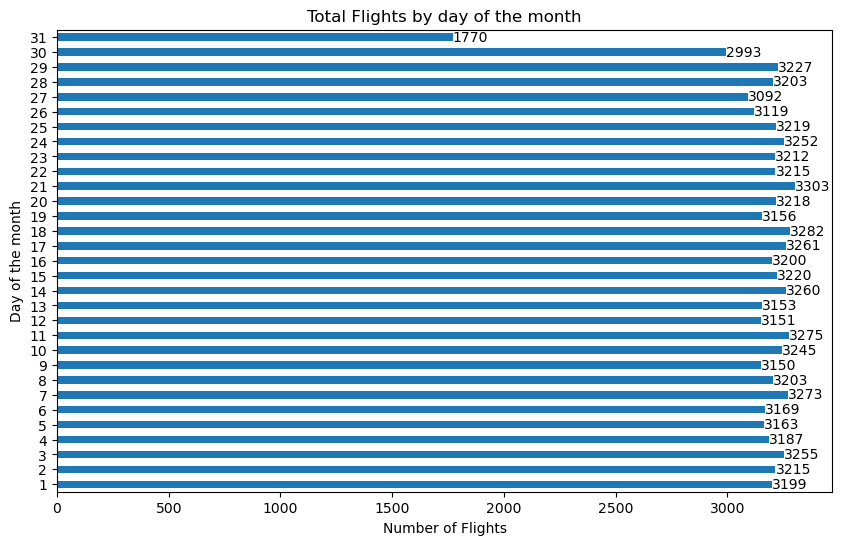

In [98]:
plt.figure(figsize=(10,6))
ax = dfcc.groupby('DayofMonth').count()['Year'].plot(kind='barh')
ax.bar_label(ax.containers[0]);
plt.title('Total Flights by day of the month');
plt.xlabel('Number of Flights');
plt.ylabel('Day of the month');

Firstly, we will try to answer what time of the day is best to travel with least possible delay. For this let's first make a column of Total Delay in minutes of flight.

In [99]:
df['delay'] = df['ArrDelay'] + df['DepDelay']
df['delay'].isna().sum()

1601

C:\Users\tegbe\AppData\Local\Temp\ipykernel_3852\504362337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(['UniqueCarrier','CRSDepHour'])['delay'].mean().unstack().reset_index().set_index('UniqueCarrier')


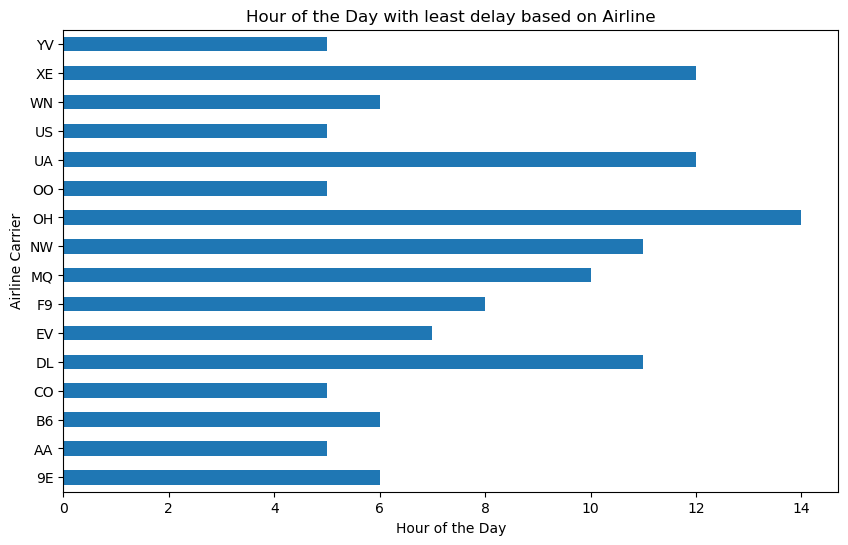

In [102]:
a = df.groupby(['UniqueCarrier','CRSDepHour'])['delay'].mean().unstack().reset_index().set_index('UniqueCarrier')
plt.figure(figsize=(10,6))
a.idxmin(axis=1).astype('int').plot(kind='barh')
plt.title('Hour of the Day with least delay based on Airline');
plt.ylabel('Airline Carrier');
plt.xlabel('Hour of the Day');

Let's explore which airline has the highest delay

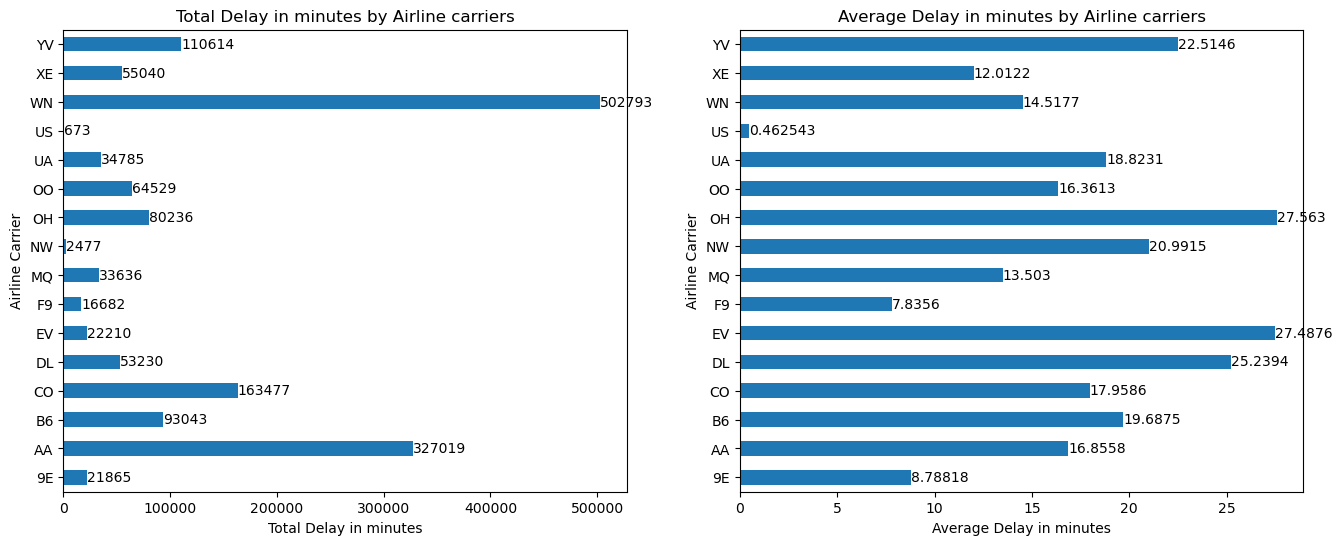

In [103]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = df.groupby(['UniqueCarrier'])['delay'].sum().plot(kind='barh')
plt.title('Total Delay in minutes by Airline carriers');
plt.ylabel('Airline Carrier');
plt.xlabel('Total Delay in minutes');
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = df.groupby(['UniqueCarrier'])['delay'].mean().plot(kind='barh')
plt.title('Average Delay in minutes by Airline carriers');
plt.ylabel('Airline Carrier');
plt.xlabel('Average Delay in minutes');
ax.bar_label(ax.containers[0]);

In [106]:
dfc = df.groupby('date')['delay'].mean() # make a copy of the dataframe
dfc

date
2008-01-01    23.060241
2008-01-02    30.533784
2008-01-03    14.542662
2008-01-04    19.763514
2008-01-05    11.550847
                ...    
2008-12-27    90.295000
2008-12-28    33.887892
2008-12-29     8.910931
2008-12-30    10.404959
2008-12-31     9.067633
Name: delay, Length: 366, dtype: float64

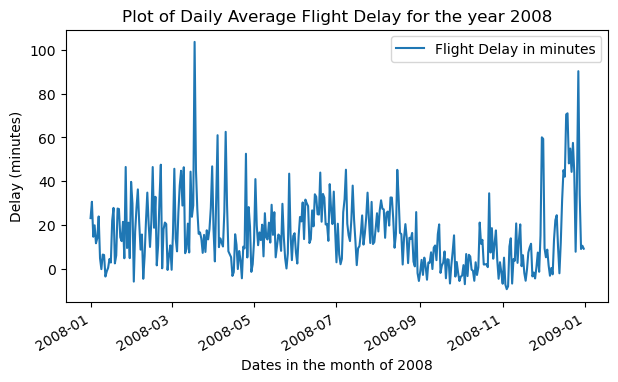

In [108]:
plt.figure(figsize=(7,4))
plt.title('Plot of Daily Average Flight Delay for the year 2008')
plt.xlabel('Dates in the month of 2008')
plt.ylabel('Delay (minutes)')
plt.plot(dfc.index,dfc.values,label='Flight Delay in minutes')

plt.gcf().autofmt_xdate()
plt.legend()

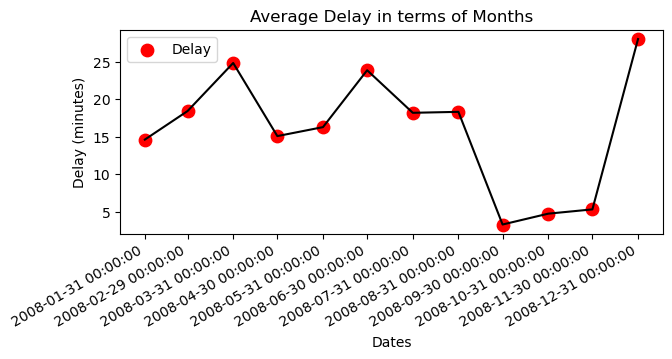

In [112]:
#let's also explore by quarter
dfc = df.set_index('date')
dfm =dfc.resample('M')['delay'].mean()

plt.figure(figsize=(7,3))
plt.title('Average Delay in terms of Months')
plt.xlabel('Dates')
plt.ylabel('Delay (minutes)')
plt.plot(dfm.index,dfm.values,color='black')
plt.scatter(dfm.index,dfm.values,label='Delay',s=80,color='red')
plt.xticks(dfm.index,dfm.index);
plt.gcf().autofmt_xdate()

plt.legend();

C:\Users\tegbe\AppData\Local\Temp\ipykernel_3852\3717745757.py:2: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df.groupby(['Dest','Month'])['delay'].mean().unstack().reset_index().set_index('Dest').idxmin(axis=1).plot(kind='barh')


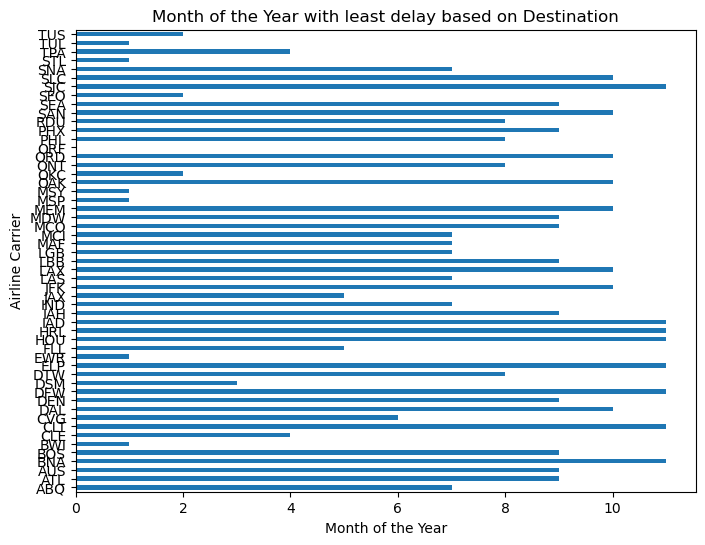

In [116]:
plt.figure(figsize=(8,6))
df.groupby(['Dest','Month'])['delay'].mean().unstack().reset_index().set_index('Dest').idxmin(axis=1).plot(kind='barh')
plt.title('Month of the Year with least delay based on Destination');
plt.ylabel('Airline Carrier');
plt.xlabel('Month of the Year');

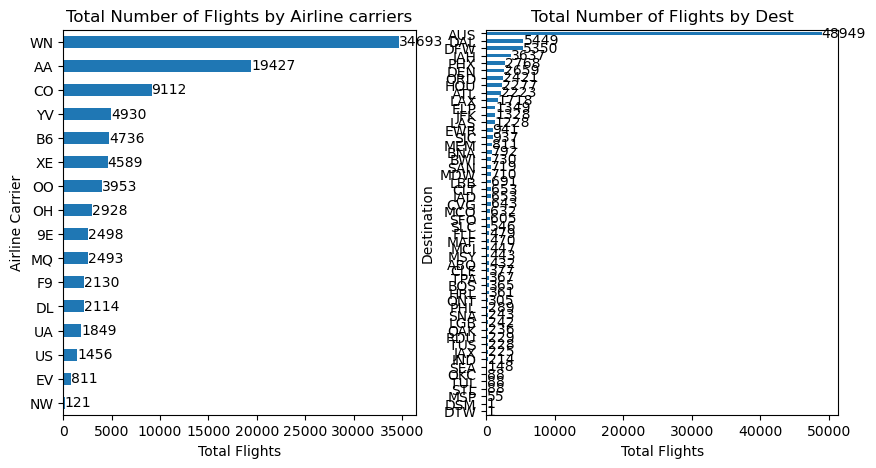

In [115]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = dfcc.groupby('UniqueCarrier').count()['Year'].sort_values().plot(kind='barh')
plt.title('Total Number of Flights by Airline carriers');
plt.ylabel('Airline Carrier');
plt.xlabel('Total Flights');
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = dfcc.groupby('Dest').count()['Year'].sort_values().plot(kind='barh')
plt.title('Total Number of Flights by Dest');
plt.ylabel('Destination');
plt.xlabel('Total Flights');
ax.bar_label(ax.containers[0]);

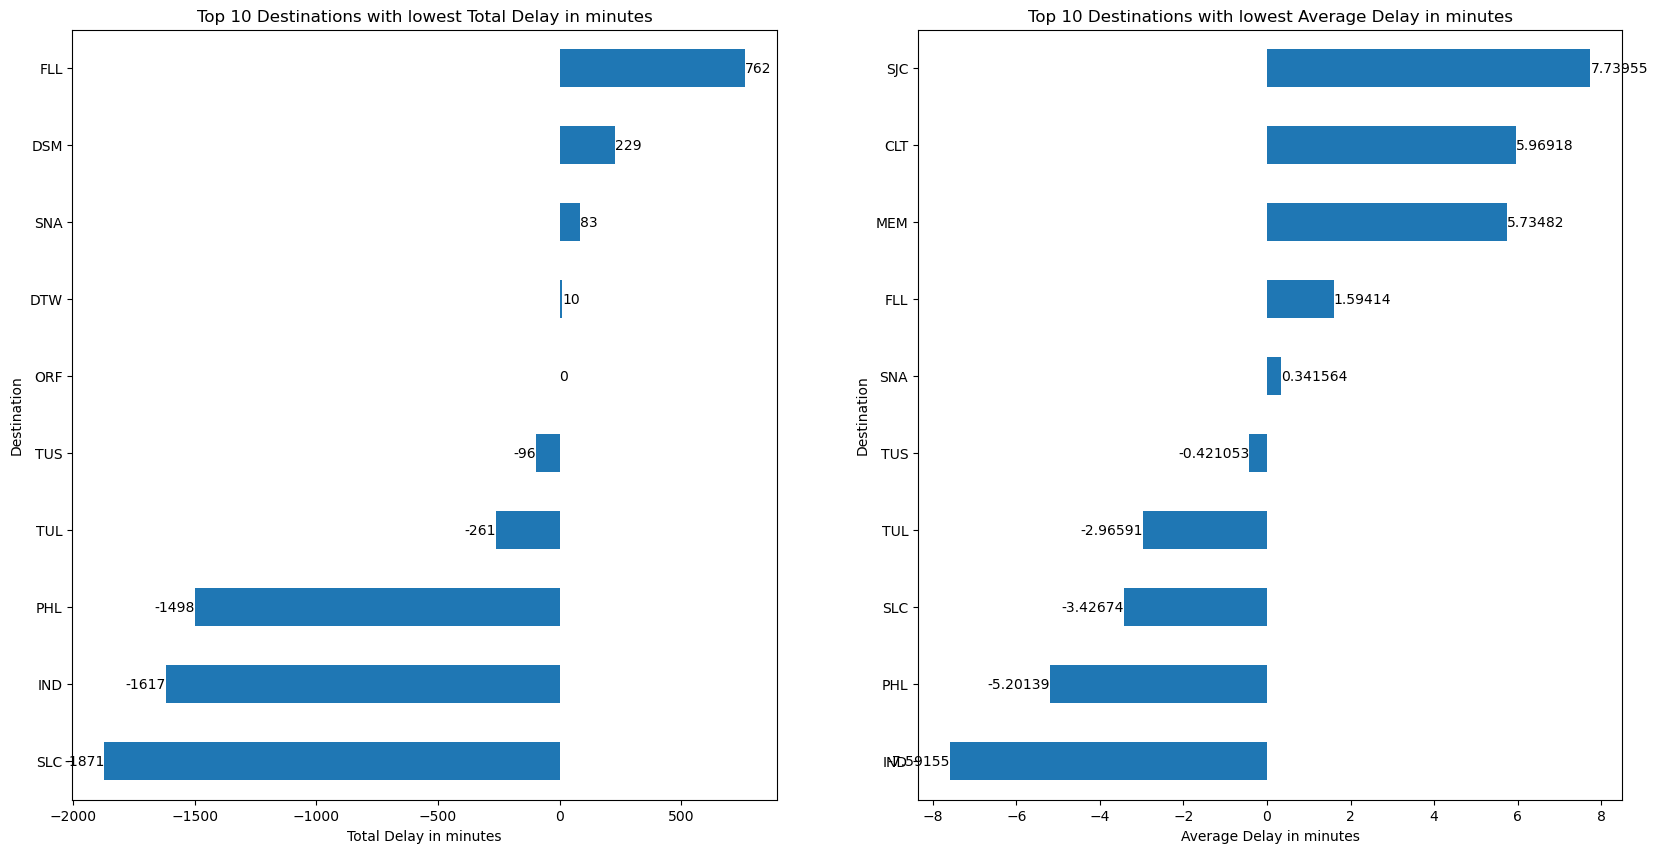

In [117]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.subplot(1,2,1)
ax = df.groupby(['Dest'])['delay'].sum().sort_values().head(10).plot(kind='barh')
plt.title('Top 10 Destinations with lowest Total Delay in minutes');
plt.ylabel('Destination');
plt.xlabel('Total Delay in minutes');
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = df.groupby(['Dest'])['delay'].mean().sort_values().head(10).plot(kind='barh')
plt.title('Top 10 Destinations with lowest Average Delay in minutes');
plt.ylabel('Destination');
plt.xlabel('Average Delay in minutes');
ax.bar_label(ax.containers[0]);

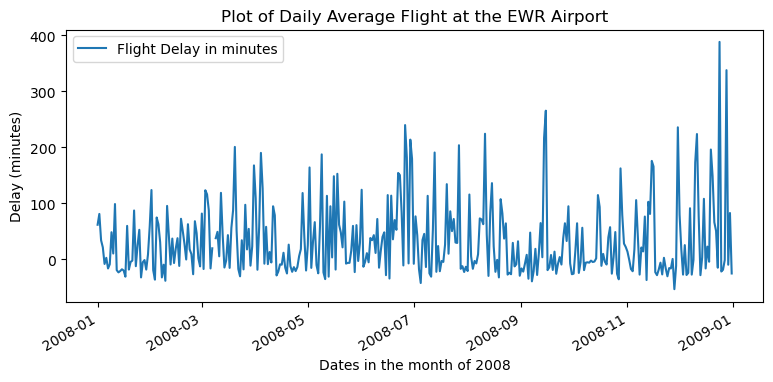

In [119]:
plt.figure(figsize=(9,4))
dfc = df[df['Dest'] == 'EWR'].groupby('date')['delay'].mean()
plt.title('Plot of Daily Average Flight at the EWR Airport')
plt.xlabel('Dates in the month of 2008')
plt.ylabel('Delay (minutes)')
plt.plot(dfc.index,dfc.values,label='Flight Delay in minutes')

plt.gcf().autofmt_xdate()
plt.legend()

C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


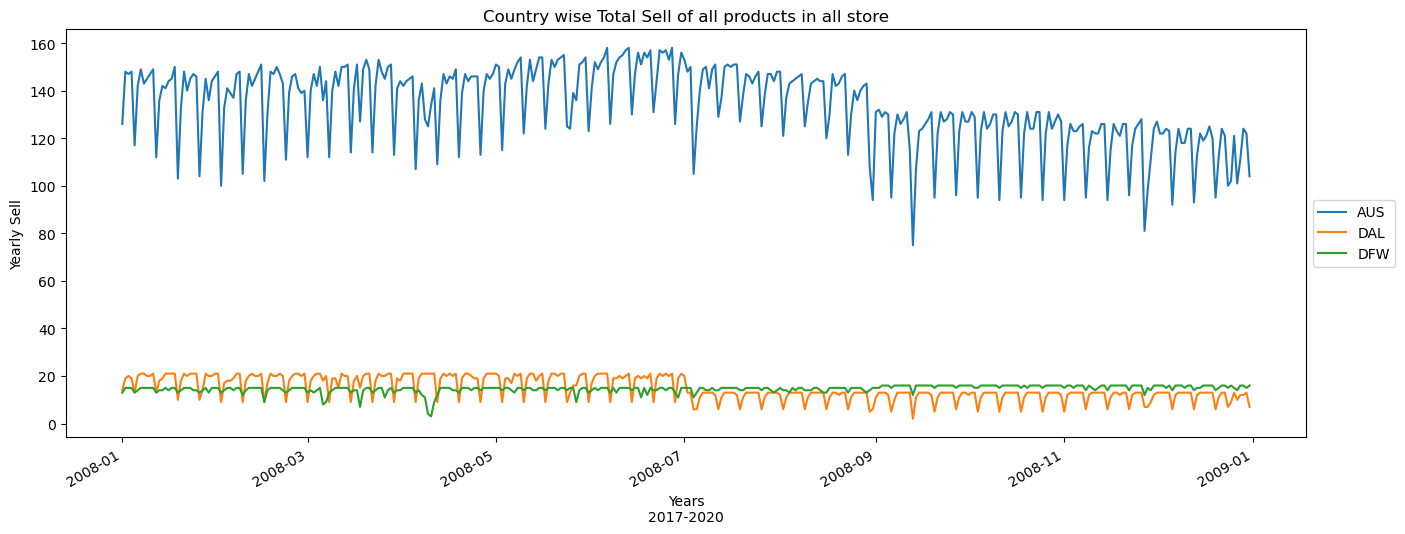

In [120]:
dfc = dfcc[(dfcc['Dest'] == 'AUS') | (dfcc['Dest'] == 'DAL') | (dfcc['Dest'] == 'DFW')]
plt.figure(figsize=(16,6))
ax = sns.lineplot(data=dfc.groupby(['Dest','date']).count(), x='date', y='Year', hue='Dest')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Years\n2017-2020')
plt.ylabel('Yearly Sell')
plt.title('Country wise Total Sell of all products in all store');
plt.gcf().autofmt_xdate()

### b.) TASK 2

In this part we will examine the data containing information on every Olympic medallist that is
listed by participant count in top 20 sports, dating back to 1896. Load the dataset task2.txt and perform
statistical analysis on the dataset. Specifically, do the following:
• Compute the 95th percentile of heights for the competitors in all Athletic events for gender Female.
Note that sport refers to the broad sports (Athletics) and event is the specific event (100-meter sprint).
• Find the single woman’s event that depicts the highest variability in the height of the competitor
across the entire history of Olympics. Use the standard deviation as the yardstick for this.
• We wish to know how the average age of swimmers in Olympic has evolved with time. How has this
changed over time? Does the trend for this differs from male to female? It will be easy to create a
data frame that will allow one to visualise these trends with time. Plot a line graph that depicts
separate line for male and female competitors. The plot must have a caption that is informative
enough to answer the 2 questions that have been asked in this part

In [121]:
df = pd.read_csv('task2.txt')
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,16,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


#### QUESTION:  Compute the 95th percentile of heights for the competitors in all Athletic events for gender Female.  Note that sport refers to the broad sports (Athletics) and event is the specific event (100-meter sprint)


In [310]:
df3['sport'].unique()

array(['Ice Hockey', 'Gymnastics', 'Rowing', 'Football', 'Fencing',
       'Athletics', 'Canoeing', 'Handball', 'Water Polo', 'Wrestling',
       'Sailing', 'Cycling', 'Hockey', 'Swimming', 'Boxing', 'Basketball',
       'Volleyball', 'Cross Country Skiing', 'Equestrianism', 'Shooting'],
      dtype=object)

In [311]:
df3['event'].unique()

array(["Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Pommelled Horse",
       "Rowing Men's Lightweight Double Sculls",
       "Football Women's Football", "Rowing Men's Coxless Pairs",
       "Fencing Men's epee, Individual",
       "Athletics Women's Javelin Throw",
       "Canoeing Men's Kayak Fours, 1,000 metres",
       "Handball Men's Handball", "Football Men's Football",
       "Water Polo Men's Water Polo",
       "Wrestling Men's Featherweight, Freestyle",
       'Sailing Mixed Two Person Heavyweight Dinghy',
       "Athletics Men's 1,500 metres", "Cycling Women's Sprint",
       "Fencing Men's Sabre, Team", "Rowing Men's Quadruple Sculls",
       "Rowing Men's Double Sculls", "Rowing Men's Coxed Pairs",
       "Hockey Men's Hockey", "Wrestling Men's Middleweight, Greco-Roman",
       "Swimming Women's 4 x 100 metres Medley Relay",
       "Boxin

In [317]:
df3[df3['event'].str.contains('100 sprint')]

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal


In [322]:
# Derving the data whose sex is Female
fdata = df3[(df3['sport'] == 'Athletics') & (df3['sex'] == 'F')]
fdata

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
10,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22,179,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
50,428,Elvan Abeylegesse,F,25,159,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver
103,846,Valerie Kasanita Adams-Vili (-Price),F,23,193,120.0,New Zealand,NZL,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Gold
104,846,Valerie Kasanita Adams-Vili (-Price),F,27,193,120.0,New Zealand,NZL,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Shot Put,Gold
105,846,Valerie Kasanita Adams-Vili (-Price),F,31,193,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,135553,Galina Ivanovna Zybina (-Fyodorova),F,21,168,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
23845,135553,Galina Ivanovna Zybina (-Fyodorova),F,25,168,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
23846,135553,Galina Ivanovna Zybina (-Fyodorova),F,33,168,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
23848,135563,Olesya Nikolayevna Zykina,F,19,171,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [321]:
fdata['event'].unique()

array(["Athletics Women's Javelin Throw",
       "Athletics Women's 5,000 metres", "Athletics Women's Shot Put",
       "Athletics Women's 4 x 400 metres Relay",
       "Athletics Women's Long Jump",
       "Athletics Women's 4 x 100 metres Relay",
       "Athletics Women's 100 metres Hurdles",
       "Athletics Women's 400 metres", "Athletics Women's Marathon",
       "Athletics Women's Discus Throw",
       "Athletics Women's 400 metres Hurdles",
       "Athletics Women's 100 metres",
       "Athletics Women's 3,000 metres Steeplechase",
       "Athletics Women's High Jump", "Athletics Women's 10,000 metres",
       "Athletics Women's 1,500 metres", "Athletics Women's Heptathlon",
       "Athletics Women's 800 metres", "Athletics Women's Pentathlon",
       "Athletics Women's 200 metres",
       "Athletics Women's 80 metres Hurdles",
       "Athletics Women's 3,000 metres",
       "Athletics Women's 10 kilometres Walk",
       "Athletics Women's Hammer Throw", "Athletics Women's Trip

In [327]:
fdata100 = fdata[fdata['event'].str.contains('100 metres Hurdles')]
fdata100

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
329,2695,Nia Sifaatihii Ali,F,27,170,65.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Silver
366,3055,Glory Alozie Oluchi,F,22,155,51.0,Nigeria,NGR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 100 metres Hurdles,Silver
581,4390,Tatyana Mikhaylovna Anisimova (Poluboyarova-),F,26,172,65.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Women's 100 metres Hurdles,Silver
2588,16188,Valeria Bufanu-tefnescu,F,25,170,60.0,Romania,ROU,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 100 metres Hurdles,Silver
2610,16305,Brigita Bukovec,F,26,168,55.0,Slovenia,SLO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 100 metres Hurdles,Silver
3019,18976,Kristi Castlin,F,28,170,60.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Bronze
3127,19878,Michle Marie George Chardonnet (-Piasenta),F,27,170,60.0,France,FRA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 100 metres Hurdles,Bronze
4688,29394,Yordanka Lyubchova Donkova,F,26,175,67.0,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres Hurdles,Gold
4689,29394,Yordanka Lyubchova Donkova,F,30,175,67.0,Bulgaria,BUL,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 100 metres Hurdles,Bronze
5113,31652,Anneliese Ehrhardt (Jahns-),F,22,166,58.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 100 metres Hurdles,Gold


### There is no event that is '100 metres sprint' so in that case I am using '100 metres hurdles'

In [330]:
_95th_percentile = fdata100['height'].quantile(0.95)
print('The 95th percentile for the height column is',_95th_percentile)

The 95th percentile for the height column is 176.0


### QUESTION:  Find the single woman’s event that depicts the highest variability in the height of the competitor across the entire history of Olympics. 

In [333]:
### Generating a new set of data
fdata2 = df3[df3['sex'] == 'F']
fdata2

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
7,37,Ann Kristin Aarnes,F,23,182,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
10,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22,179,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
20,90,Tamila Rashidovna Abasova,F,21,163,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
34,259,Reema Abdo,F,21,173,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze
46,394,Irene Abel,F,19,160,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,135553,Galina Ivanovna Zybina (-Fyodorova),F,21,168,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
23845,135553,Galina Ivanovna Zybina (-Fyodorova),F,25,168,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
23846,135553,Galina Ivanovna Zybina (-Fyodorova),F,33,168,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
23848,135563,Olesya Nikolayevna Zykina,F,19,171,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [336]:
sd_fdata2  = fdata2.groupby('event')['height'].std().reset_index()
sd_fdata2

,event,height
0,"Athletics Women's 1,500 metres",5.032908
1,Athletics Women's 10 kilometres Walk,4.308906
2,"Athletics Women's 10,000 metres",5.409697
3,Athletics Women's 100 metres,6.289850
4,Athletics Women's 100 metres Hurdles,4.677272
...,...,...
127,"Wrestling Women's Flyweight, Freestyle",2.924445
128,"Wrestling Women's Heavyweight, Freestyle",4.250490
129,"Wrestling Women's Light-Heavyweight, Freestyle",6.658328
130,"Wrestling Women's Lightweight, Freestyle",3.976119


In [340]:
sd_fdata2.sort_values('height',ascending=False)

,event,height
84,Rowing Women's Coxed Fours,10.865490
27,Basketball Women's Basketball,9.700255
85,Rowing Women's Coxed Quadruple Sculls,9.246396
83,Rowing Women's Coxed Eights,8.741931
110,Swimming Women's 100 metres Butterfly,8.134399
...,...,...
127,"Wrestling Women's Flyweight, Freestyle",2.924445
30,Boxing Women's Middleweight,2.911390
92,Sailing Mixed Multihull,2.081666
98,Shooting Mixed Skeet,NaN


#### The answer to the question is Rowing Women's Coxed Fours

### QUESTION: How the average age of swimmers in Olympic has evolved with time. How has this changed over time?

In [341]:
df3.columns

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')

In [357]:
mdata2 = df3[df3['sex'] == 'M']
mdata = mdata2.groupby('year')['age'].mean().reset_index()
mdata

,year,age
0,1896,23.277778
1,1900,23.542857
2,1904,23.481481
3,1906,26.561404
4,1908,24.280303
5,1912,23.937500
6,1920,25.572289
7,1924,25.285714
8,1928,24.788732
9,1932,24.117241


In [129]:
fdata = fdata2.groupby('year')['age'].mean().reset_index()

NameError: name 'fdata2' is not defined

C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

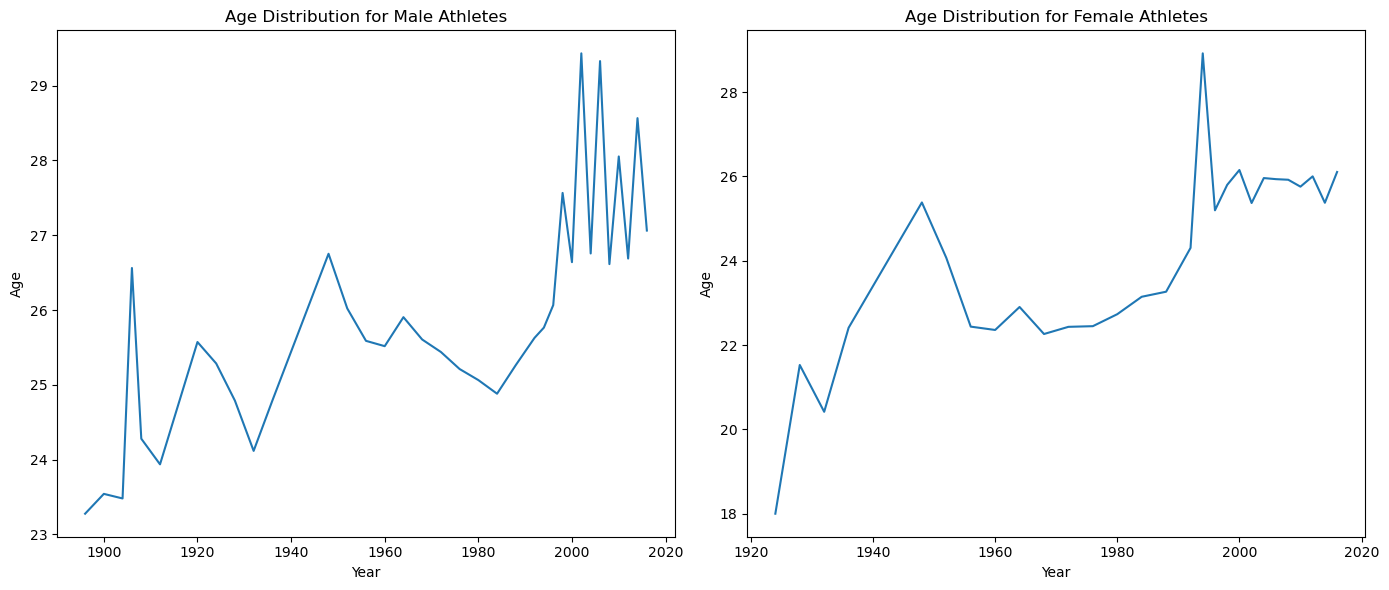

In [359]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot for male athletes
sns.lineplot(x='year', y='age', data=mdata, ax=axes[0])
axes[0].set_title('Age Distribution for Male Athletes')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Age')

# Second subplot for female athletes
sns.lineplot(x='year', y='age', data=fdata, ax=axes[1])
axes[1].set_title('Age Distribution for Female Athletes')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Age')


plt.tight_layout()
plt.show()

- From the Line plots above, we can see that average age over the years was in an upward trend for both Genders
- However among the Male athletes, from 1960 to 1980 the avereage age decreased meaning younger male athletes competed. This is not the case among Female athletes during the period.
- The female average age dropped in 1997-8

In [122]:
##good solu

## to filter athelatic events
dfc = df[df['sport'] == 'Athletics']
dfc = dfc[dfc['event'].str.contains("Women")]
## to get 95th percentile value
print('The 95th Percentile value of Female height is',np.percentile(dfc['height'],95),'cm for all female athelatic sports')

The 95th Percentile value of Female height is 183.0 cm for all female athelatic sports


We can identify the variability based on the standard deviation.
\
Let's first find the top 5 woman event with highest variabile in heights.

In [123]:
df[df['event'].str.contains("Women")].groupby('event')['height'].std().sort_values(ascending=False).head(5)

event
Rowing Women's Coxed Fours               10.865490
Basketball Women's Basketball             9.700255
Rowing Women's Coxed Quadruple Sculls     9.246396
Rowing Women's Coxed Eights               8.741931
Swimming Women's 100 metres Butterfly     8.134399
Name: height, dtype: float64

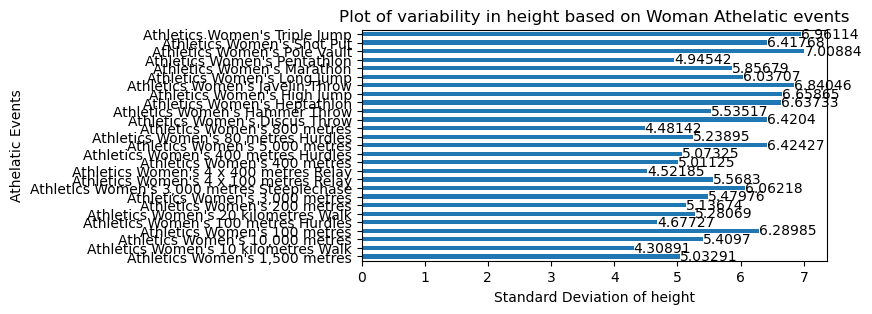

In [126]:
#let's filter the sport first
dfc = df[df['sport'] == 'Athletics']

## filtering the event out and plotting it
plt.figure(figsize=(6,3));
ax = dfc[dfc['event'].str.contains('Women')].groupby('event')['height'].std().plot(kind='barh')
plt.title('Plot of variability in height based on Woman Athelatic events');
plt.ylabel('Athelatic Events');
plt.xlabel('Standard Deviation of height');
ax.bar_label(ax.containers[0]);

**Question:** To answer how the average age of male and female swimmers has evolved over time.

In [127]:
## let's filter the dataframe with swiiming relating events only
dfs = df[df['sport'] == 'Swimming']

## now it is time to separate out male and female swimmers
dfm = dfs[dfs['event'].str.contains("Men's")]
dfm = dfm.groupby('year')['age'].mean()

dff = dfs[dfs['event'].str.contains("Women's")]
dff = dff.groupby('year')['age'].mean()

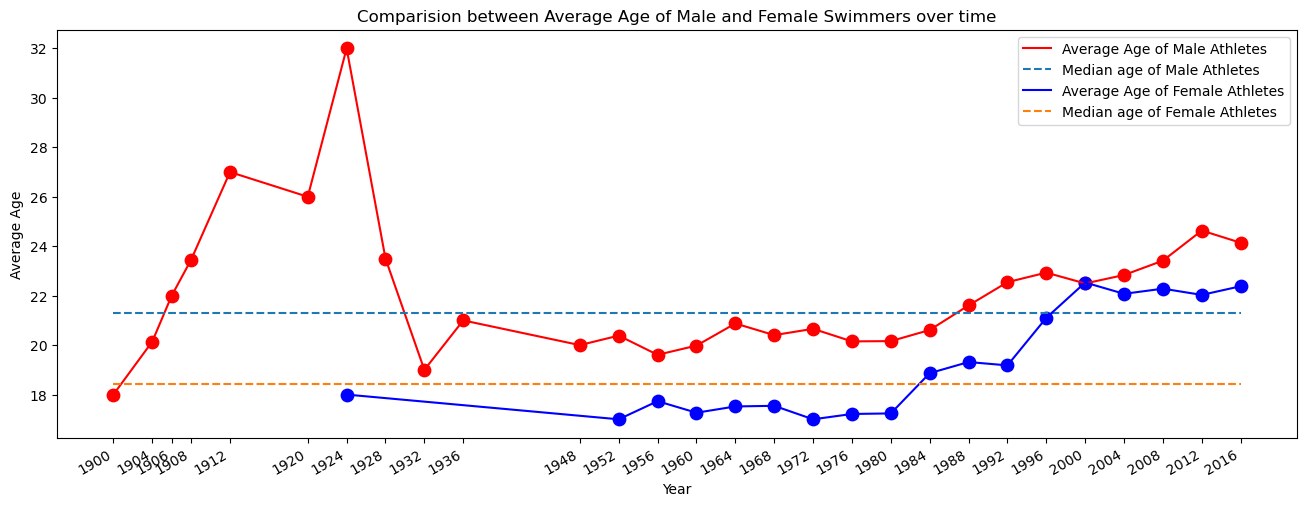

In [128]:
plt.figure(figsize=(16,6))

plt.plot(dfm,color='red',label='Average Age of Male Athletes')
plt.plot(dfm.index, [dfm.median()]*len(dfm), label='Median age of Male Athletes',linestyle='--')
plt.scatter(dfm.index,dfm.values,s=80,color='red')
plt.xticks(dfm.index,dfm.index);
plt.gcf().autofmt_xdate()

plt.plot(dff,color='blue',label='Average Age of Female Athletes')
plt.plot(dfm.index, [dff.median()]*len(dfm), label='Median age of Female Athletes',linestyle='--')
plt.scatter(dff.index,dff.values,s=80,color='blue')
plt.title('Comparision between Average Age of Male and Female Swimmers over time');
plt.xlabel('Year');
plt.ylabel('Average Age');
plt.legend();

### In class Exercise

#### 1.
A company specializes in spherical segments and wants to automate the calculation of the lateral surface area,
total surface area, and volume. Implement these calculations in Python using a class. The formulas are given as:

You should define a class that contains methods for each of the calculations (lateral surface area, total surface
area, and volume). For the calculation, a variable is required for storing the result, as well as separate variables
for the radius and the height. What is the result for the following values? Print the results using a print()
statement.

In [1]:
import math

class SphericalSegment:
    def __init__(self, r, h):
        self.r = r  # Radius of the base of the spherical segment
        self.h = h  # Height of the spherical segment

    def lateral_surface_area(self):
        R = self.h * (2 * self.r - self.h) # Formula: LSA = π * R * r where R = h(2r - h)
        return math.pi * R * self.r    #  R = math.sqrt(h * (2 * r - h))

    def total_surface_area(self):
        R = self.h * (2 * self.r - self.h)   # Formula: TSA = π * r * (2h + h(2r - h))
        return math.pi * self.r * (2 * self.h + R)

    def volume(self):
        # Formula: V = (2/3) * π * r^2 * h
        return (2 / 3) * math.pi * self.r**2 * self.h
        
r = 4.0  # Radius of the spherical segment
h = 2.0  # Height of the spherical segment

segment = SphericalSegment(r, h)
lateral_surface_area = segment.lateral_surface_area()
total_surface_area = segment.total_surface_area()
volume = segment.volume()

print(f"Lateral Surface Area: {lateral_surface_area:.2f}")
print(f"Total Surface Area: {total_surface_area:.2f}")
print(f"Volume: {volume:.2f}")

Lateral Surface Area: 150.80
Total Surface Area: 201.06
Volume: 67.02


#### 2.
In this part of the assignment, you have to write a word count program. Your program should read the
provided text document on learnweb named random text.txt and then output the following stats:
a) The number of unique non-stop words.
(Hint: you can use "nltk" library to get a list of English language stop words.)
b) The top 5 most frequent non-stop words.

In [2]:
with open("random_text.txt","r") as f:
    for line in f:
        print(line)

Harry James Potter was an English half-blood wizard, and one of the most famous wizards of modern times. The only child and son of James and Lily Potter (nÃ©e Evans), Harry's birth was overshadowed by a prophecy, naming either himself or Neville Longbottom as the one with the power to vanquish Lord Voldemort, the most powerful and feared Dark Wizard in the world. After half of the prophecy was reported to Voldemort, courtesy of Severus Snape, Harry was chosen as the target due to his many similarities with the Dark Lord. In turn, this caused the Potter family to go into hiding.



Voldemort made his first attempt to circumvent the prophecy when Harry was a year and three months old. During this attempt, he murdered Harry's parents as they tried to protect him, but this unsuccessful attempt to kill Harry led to Voldemort's first downfall. This downfall marked the end of the First Wizarding War, and to Harry henceforth being known as "The Boy Who Lived", as he was the only known survivor

In [5]:
with open("random_text.txt","r") as f:
    for line in f:
        words=line.split(' ')
        for x in words:
          print(x)

Harry
James
Potter
was
an
English
half-blood
wizard,
and
one
of
the
most
famous
wizards
of
modern
times.
The
only
child
and
son
of
James
and
Lily
Potter
(nÃ©e
Evans),
Harry's
birth
was
overshadowed
by
a
prophecy,
naming
either
himself
or
Neville
Longbottom
as
the
one
with
the
power
to
vanquish
Lord
Voldemort,
the
most
powerful
and
feared
Dark
Wizard
in
the
world.
After
half
of
the
prophecy
was
reported
to
Voldemort,
courtesy
of
Severus
Snape,
Harry
was
chosen
as
the
target
due
to
his
many
similarities
with
the
Dark
Lord.
In
turn,
this
caused
the
Potter
family
to
go
into
hiding.



Voldemort
made
his
first
attempt
to
circumvent
the
prophecy
when
Harry
was
a
year
and
three
months
old.
During
this
attempt,
he
murdered
Harry's
parents
as
they
tried
to
protect
him,
but
this
unsuccessful
attempt
to
kill
Harry
led
to
Voldemort's
first
downfall.
This
downfall
marked
the
end
of
the
First
Wizarding
War,
and
to
Harry
henceforth
being
known
as
"The
Boy
Who
Lived",
as
he
was
the
only
known
survivor

In [19]:
word_stats = {}

with open("random_text.txt","r") as f:
    for line in f:
        words=line.split(' ')
        for x in words:
            if x in word_stats:
                word_stats[x]+=1
            else:
                word_stats[x] = 1
                
print(word_stats)

{'Harry': 26, 'James': 3, 'Potter': 3, 'was': 18, 'an': 4, 'English': 1, 'half-blood': 1, 'wizard,': 1, 'and': 35, 'one': 2, 'of': 43, 'the': 69, 'most': 2, 'famous': 1, 'wizards': 1, 'modern': 1, 'times.': 1, 'The': 4, 'only': 7, 'child': 1, 'son': 2, 'Lily': 2, '(nÃ©e': 1, 'Evans),': 1, "Harry's": 4, 'birth': 1, 'overshadowed': 1, 'by': 4, 'a': 8, 'prophecy,': 2, 'naming': 1, 'either': 2, 'himself': 1, 'or': 3, 'Neville': 1, 'Longbottom': 1, 'as': 7, 'with': 6, 'power': 1, 'to': 33, 'vanquish': 1, 'Lord': 3, 'Voldemort,': 3, 'powerful': 2, 'feared': 1, 'Dark': 7, 'Wizard': 1, 'in': 16, 'world.': 1, 'After': 3, 'half': 1, 'prophecy': 3, 'reported': 1, 'courtesy': 1, 'Severus': 2, 'Snape,': 1, 'chosen': 1, 'target': 1, 'due': 3, 'his': 19, 'many': 3, 'similarities': 1, 'Lord.': 2, 'In': 4, 'turn,': 1, 'this': 5, 'caused': 1, 'family': 2, 'go': 1, 'into': 2, 'hiding.\n': 1, '\n': 7, 'Voldemort': 5, 'made': 2, 'first': 4, 'attempt': 3, 'circumvent': 1, 'when': 2, 'year': 2, 'three': 3, '

In [44]:
sorted_dict = dict(sorted(word_stats.items())[:15])
sorted_dict

{'\n': 7,
 '"Teddy"': 1,
 '"The': 1,
 '"move': 1,
 '"not': 1,
 '&': 1,
 '(i.e.,': 1,
 '(nÃ©e': 1,
 '1991.': 1,
 '2007,': 1,
 '2020.\n': 1,
 '26,': 1,
 '4': 1,
 'After': 3,
 'Against': 4}

In [15]:
sorted_dict = dict(sorted(word_stats.items(), reverse=True,key=lambda items: items[1])[:5])
sorted_dict

{'the': 69, 'of': 43, 'and': 35, 'to': 33, 'Harry': 26}

In [30]:
#Good solution
import re # for removing punctuation
from nltk.corpus import stopwords #for filtering stopwords
from collections import Counter #for counting the frequency of the words"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tegbe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [46]:
import matplotlib.pyplot as plt
with open('random_text.txt','r') as f: #opens a file
    text = f.read().lower()

#to tokenize words properly, we are required to remove the punctuations from the tokens.
words = []
letter_freq = {}
for word in text.split():
    cleaned = re.sub(r'[^\w\s]', '', word)
    #The re.sub function is used to subsitute a pattern with some other pattern or when passed empty string it simply deletes it
    words.append(cleaned) 
    for letter in cleaned:
        if not letter in letter_freq.keys():
            letter_freq[letter] = 1
        else:
            letter_freq[letter] += 1

stoplist = stopwords.words('english')
clean = [word for word in words if word not in stoplist] #here the stopwords is removed from the list
count = Counter(clean) #counts the frequency of each word
print('The number of unique non-stop words are', len(count))
print('The top 5 most common words and the time they have repeated are')
print(count.most_common(5)) #prints the 5 most common word and number of times it has been used

The number of unique non-stop words are 378
The top 5 most common words and the time they have repeated are
[('harry', 26), ('voldemort', 9), ('also', 8), ('dark', 7), ('school', 6)]


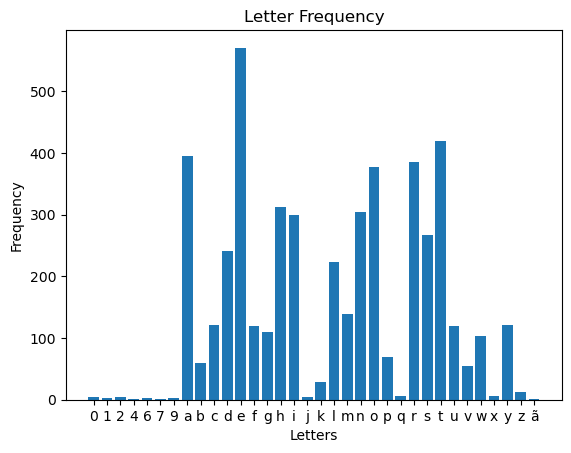

In [47]:
sorted_letters = sorted(letter_freq.keys())  #sort letters in alphabetical order
frequencies = [letter_freq[letter] for letter in sorted_letters] #extract frequencies in the sorted order
plt.bar(sorted_letters, frequencies)
plt.title('Letter Frequency')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.show()

In a simple regression problem we fit a straight line y = mx + b to a given data. However, not all problems
in nature are by default linear. Given the data below see if a straight line is a good fit

In cases where the data does not follow a linear trend, one can transform the variables and then apply the
linear regression technique to better fit the data. From the given choices, try which function would be a
better representation for the data.
a) Linear : y = mx + b
b) Power : y = bxm
c) Exponential : y = bemx
d) Logarithmic : y = mlogx + b
e) Reciproca / y =
1
mx+b
Generate a 2 x 2 subplot with the following techniques, plot, semilogx, semilogy, loglog. Read about these
plotting techniques. These plots will let you understand which of the above 5 choices will be the best fit.
Plot the data points and the best fit curve in a well-formatted plot with axis labels, title and the legend.
(Hint: you can use the polyfit function from numpy for this part..

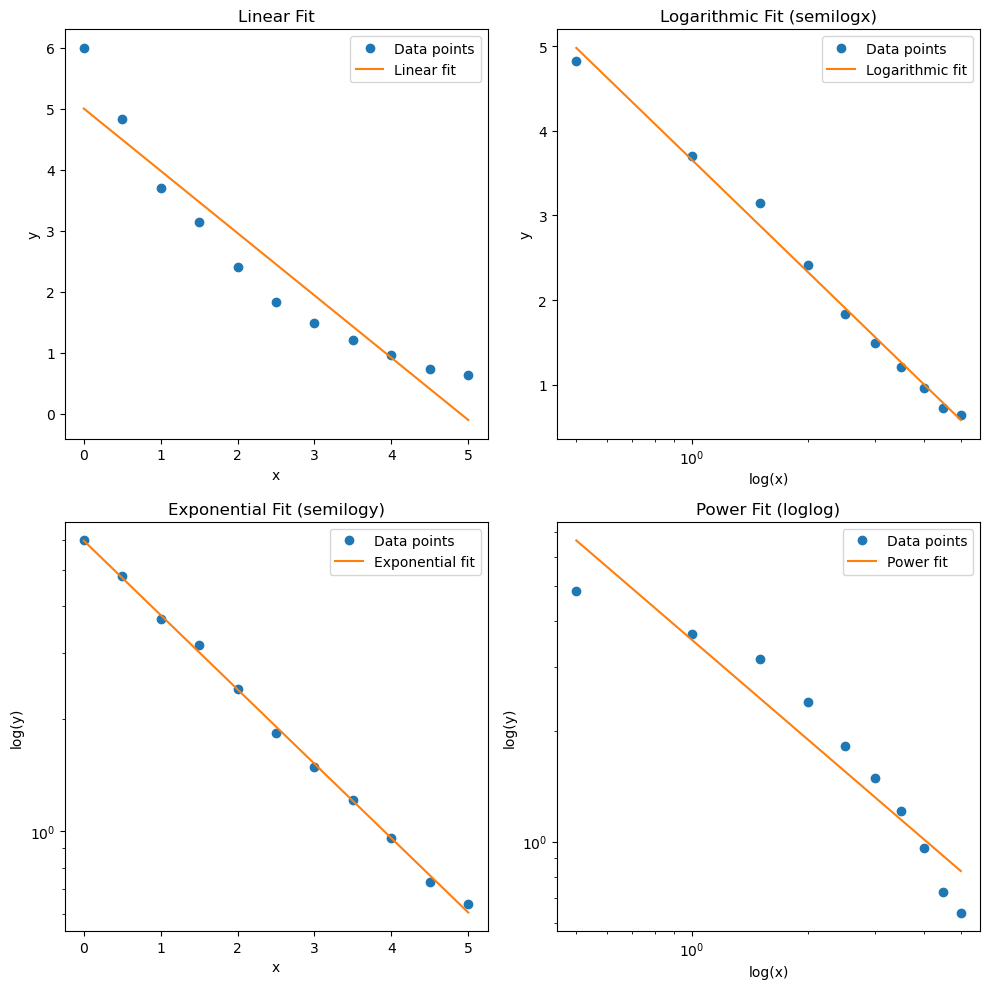

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.array([6.0, 4.83, 3.7, 3.15, 2.41, 1.83, 1.49, 1.21, 0.96, 0.73, 0.64])

# 1. Linear Fit: y = mx + b
linear_fit = np.polyfit(x, y, 1)
linear_fit_fn = np.poly1d(linear_fit)

# 2. Power Fit: y = bx^m (log transformation to make it linear)
log_x = np.log(x[1:])  # Exclude x=0 for logarithmic transformations
log_y = np.log(y[1:])
power_fit = np.polyfit(log_x, log_y, 1)
power_fit_fn = lambda x: np.exp(power_fit[1]) * x**power_fit[0]

# 3. Exponential Fit: y = be^(mx) (log transformation to make it linear in y)
exp_fit = np.polyfit(x, np.log(y), 1)
exp_fit_fn = lambda x: np.exp(exp_fit[1]) * np.exp(exp_fit[0] * x)

# 4. Logarithmic Fit: y = m log(x) + b (only applies for x > 0)
logarithmic_fit = np.polyfit(np.log(x[1:]), y[1:], 1)
logarithmic_fit_fn = lambda x: logarithmic_fit[0] * np.log(x) + logarithmic_fit[1]

# 5. Reciprocal Fit: y = 1 / (mx + b)
reciprocal_fit = np.polyfit(x, 1/y, 1)
reciprocal_fit_fn = lambda x: 1 / (reciprocal_fit[0] * x + reciprocal_fit[1])

# Plotting the results
plt.figure(figsize=(10, 10))

# Subplot 1: Regular plot (Linear)
plt.subplot(2, 2, 1)
plt.plot(x, y, 'o', label='Data points')
plt.plot(x, linear_fit_fn(x), '-', label='Linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')
plt.legend()

# Subplot 2: semilogx (Logarithmic x-axis)
plt.subplot(2, 2, 2)
plt.semilogx(x[1:], y[1:], 'o', label='Data points')
plt.semilogx(x[1:], logarithmic_fit_fn(x[1:]), '-', label='Logarithmic fit')
plt.xlabel('log(x)')
plt.ylabel('y')
plt.title('Logarithmic Fit (semilogx)')
plt.legend()

# Subplot 3: semilogy (Logarithmic y-axis)
plt.subplot(2, 2, 3)
plt.semilogy(x, y, 'o', label='Data points')
plt.semilogy(x, exp_fit_fn(x), '-', label='Exponential fit')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.title('Exponential Fit (semilogy)')
plt.legend()

# Subplot 4: loglog (Logarithmic both axes)
plt.subplot(2, 2, 4)
plt.loglog(x[1:], y[1:], 'o', label='Data points')
plt.loglog(x[1:], power_fit_fn(x[1:]), '-', label='Power fit')
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Power Fit (loglog)')
plt.legend()

plt.tight_layout()
plt.show()


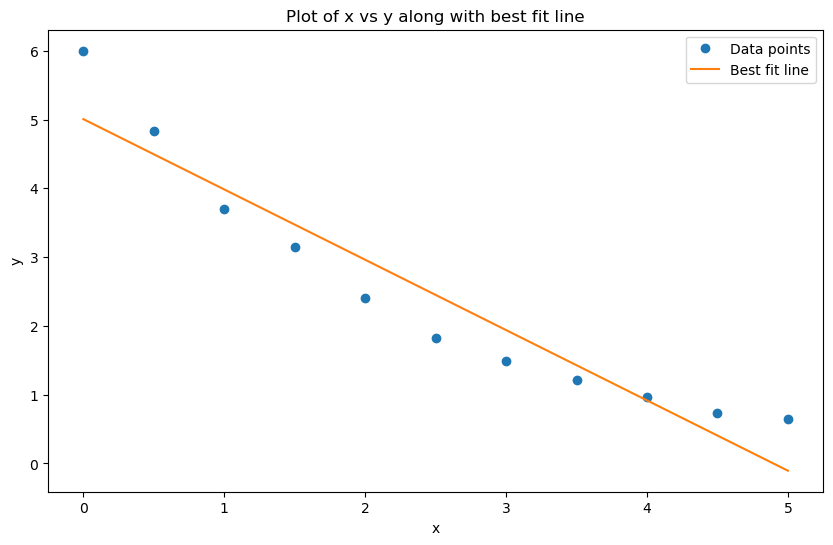

In [57]:
## good solu
x = np.linspace(0,5,11)
y = np.array([6.0,4.83,3.7,3.15,2.41,1.83,1.49,1.21,0.96,0.73,0.64])

B1, B0 = np.polyfit(x,y,1) ## fitting the best fit line using numpy polyfit function

plt.figure(figsize=(10,6)) #First check how good a straight line fits the data
plt.plot(x,y,'o',label='Data points')
plt.plot(x,B0+B1*x,label='Best fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x vs y along with best fit line')
plt.legend()

C:\Users\tegbe\AppData\Local\Temp\ipykernel_3852\1688623242.py:6: RuntimeWarning: divide by zero encountered in log
  ax[0,1].plot(np.log(x),y); #this takes log of the x and keep the y intact
C:\Users\tegbe\AppData\Local\Temp\ipykernel_3852\1688623242.py:12: RuntimeWarning: divide by zero encountered in log
  ax[1,1].plot(np.log(x),np.log(y)); #this takes log of both x and y and plot them


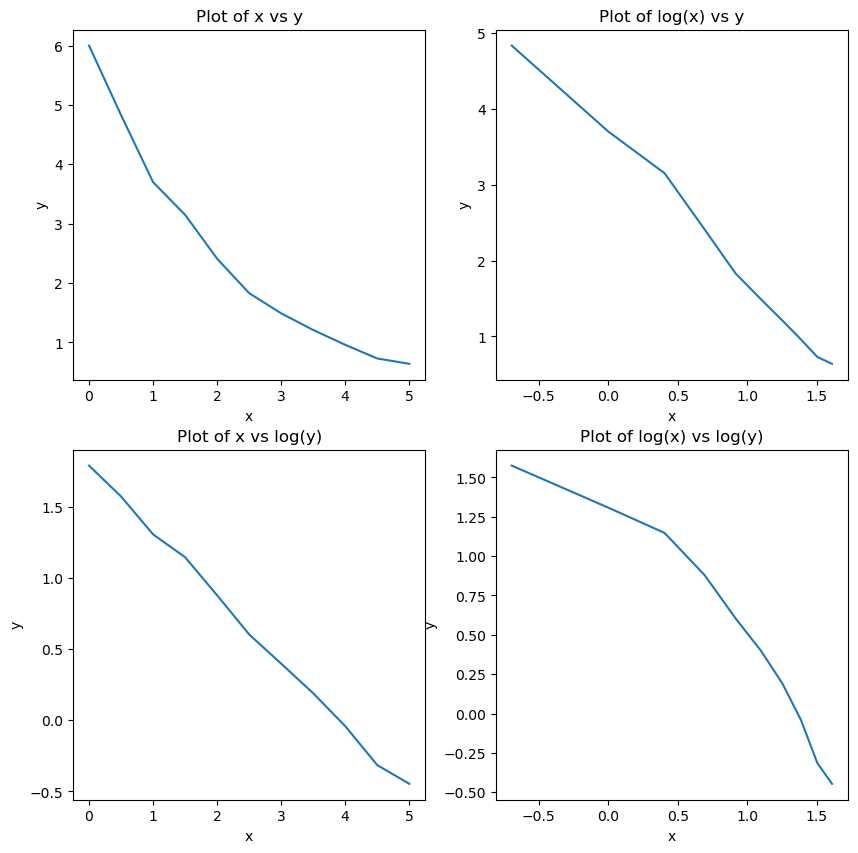

In [58]:
fig, ax = plt.subplots(2,2,figsize=(10,10)); # this gives us a figure with 4 subplots

ax[0,0].plot(x,y); #simple plot between x and y  ## now we can slice into any subplot we want with indexing the axis
ax[0,0].set_title('Plot of x vs y')

ax[0,1].plot(np.log(x),y); #this takes log of the x and keep the y intact
ax[0,1].set_title('Plot of log(x) vs y')

ax[1,0].plot(x,np.log(y)); #this takes log of the y and keep the x intact
ax[1,0].set_title('Plot of x vs log(y)')

ax[1,1].plot(np.log(x),np.log(y)); #this takes log of both x and y and plot them
ax[1,1].set_title('Plot of log(x) vs log(y)')

#to add the x and y labels to all plots
for ax in ax.flat:
    ax.set(xlabel='x', ylabel='y')

The above graph reveals us that the plot of x and log(y) is very close to straight line so it is going to fit the data more accurately. This means that the exponential curve y = b*e^mx is going to fit our data the best.

we have, y = b * e^mx
taking log on both sides
log(y) = log(b * e^mx)
using property log(ab) = log(a)+log(b)
log(y) = log(b) + mx
here, we suppose log(y) as Y and log(b) as B
Y = B + mx This equation is linear now and we are going to fit it using polyfit function

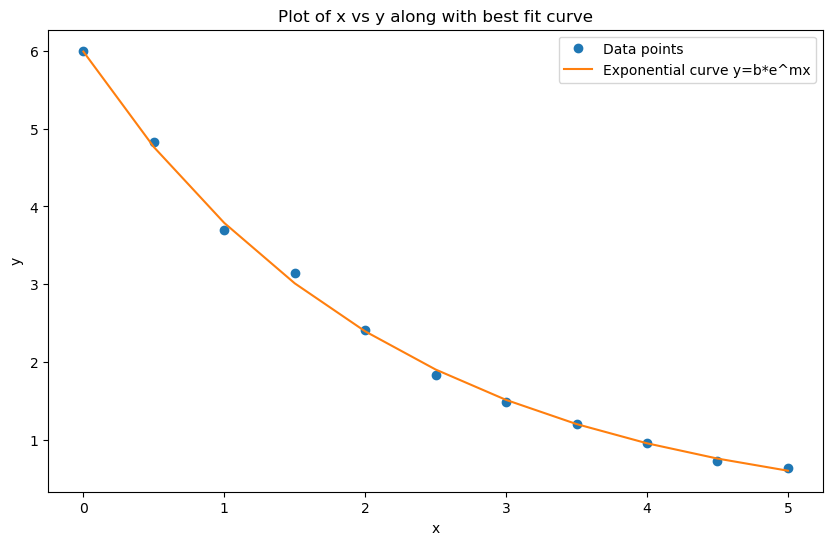

In [59]:
m, B = np.polyfit(x,np.log(y),1)
b = np.exp(B) # now to get the value of b
# our equation is y = b*e^mx
y_hat = b*np.exp(m*x)

## Checking how good the exponential curve has fit to our data
plt.figure(figsize=(10,6))
plt.plot(x,y,'o',label='Data points')
plt.plot(x,y_hat,label='Exponential curve y=b*e^mx')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x vs y along with best fit curve')
plt.legend()

### In class exercise using assingment (curve_fit) 

Fitted parameters: a = 6.019578891017493, b = -0.46026480297754097


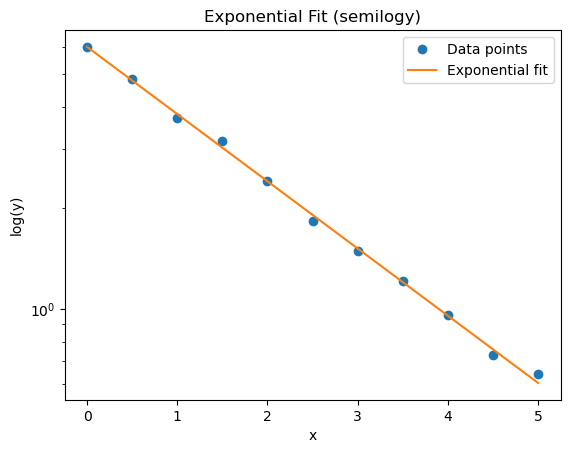

In [61]:
# 3. Exponential Fit: y = be^(mx) (log transformation to make it linear in y)
#exp_fit = np.polyfit(x, np.log(y), 1)
#exp_fit_fn = lambda x: np.exp(exp_fit[1]) * np.exp(exp_fit[0] * x)

from scipy.optimize import curve_fit

#Creating the exponential function
def exponential_func(x, b, m):
    return b * np.exp(m * x)

X = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.array([6.0, 4.83, 3.7, 3.15, 2.41, 1.83, 1.49, 1.21, 0.96, 0.73, 0.64])
#Using the curve_fit module, we can fit into our model and extract the parameters
pop, pco = curve_fit(exponential_func, X, y)

b, m = pop
print(f"Fitted parameters: a = {b}, b = {m}")

# Plot the original data
plt.plot(X, y, 'o', label='Data points')
plt.semilogy(X, exponential_func(X, *pop), '-', label='Exponential fit')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.title('Exponential Fit (semilogy)')
plt.legend()


 Use the provided data below and apply linear regression using the LinearRegression class from scikit-learn.
You will fit a linear regression model and then generate a plot that shows both the original data points and the
fitted curve on the same graph.
Additionally, you are required to compute and report the following evaluation metrics for both the training and
test data:
• Root Mean Squared Error (RMSE)
• Mean Absolute Error (MAE)
• Mean Squared Error (MSE)
Steps:
a) Convert the provided training data to a logarithmic scale (both x and y).
b) Use LinearRegression from the scikit-learn library to fit the linear regression model to the transformed
training data.
c) Extract the slope and intercept of the fitted line.
d) Convert the intercept back to its original scale to get the coefficient b.
e) Using additional test data, compute the RMSE, MAE, and MSE for both the training data and the test data
using the original (non-logarithmic) values.
f) Generate a plot that includes both the original training data points, the test data points, and the fitted curve
based on the power function.


Slope (m): 2.1017754670557154
Intercept (b): 2.7202902474268877
Training Metrics:
 - RMSE: 23.68
 - MAE: 15.89
 - MSE: 560.89
Test Metrics:
 - RMSE: 38.33
 - MAE: 27.27
 - MSE: 1469.44


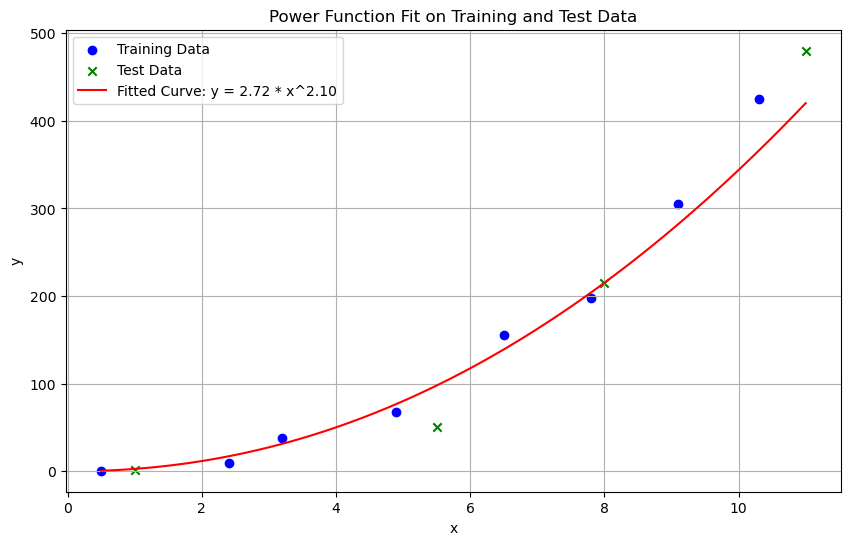

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Given training data (x, y) and test data
x_train = np.array([0.5, 2.4, 3.2, 4.9, 6.5, 7.8, 9.1, 10.3])
y_train = np.array([0.8, 9.3, 37.9, 68.2, 155, 198, 305, 425])

x_test = np.array([1.0, 5.5, 8.0, 11.0])
y_test = np.array([1.5, 50, 215, 480])

# Step a: Convert the data to logarithmic scale
log_x_train1 = np.log(x_train).reshape(-1, 1)
log_y_train = np.log(y_train)

log_x_test = np.log(x_test).reshape(-1, 1)
log_y_test = np.log(y_test)

# Step b: Fit a linear regression model on the log-transformed training data
model = LinearRegression()
model.fit(log_x_train1, log_y_train)

# Step c: Extract the slope (m) and intercept (log_b) from the model
slope = model.coef_[0]
log_intercept = model.intercept_

# Step d: Convert the intercept back to its original scale to get coefficient b
intercept = np.exp(log_intercept)

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

# The power law model is y = b * x^m

# Step e: Predict on both the training and test data using the fitted model
# Convert back from log scale to original scale
y_train_pred = intercept * x_train ** slope
y_test_pred = intercept * x_test ** slope

# Compute RMSE, MAE, and MSE for both training and test data
def calculate_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    return mse, rmse, mae

train_mse, train_rmse, train_mae = calculate_metrics(y_train, y_train_pred)
test_mse, test_rmse, test_mae = calculate_metrics(y_test, y_test_pred)

print(f"Training Metrics:")
print(f" - RMSE: {train_rmse:.2f}")
print(f" - MAE: {train_mae:.2f}")
print(f" - MSE: {train_mse:.2f}")

print(f"Test Metrics:")
print(f" - RMSE: {test_rmse:.2f}")
print(f" - MAE: {test_mae:.2f}")
print(f" - MSE: {test_mse:.2f}")

# Step f: Plot the data points and the fitted power law curve
plt.figure(figsize=(10, 6))

# Plot the original training and test data points
plt.scatter(x_train, y_train, color='blue', label='Training Data', marker='o')
plt.scatter(x_test, y_test, color='green', label='Test Data', marker='x')

# Plot the fitted curve
x_range = np.linspace(0.5, 11, 100)
y_fitted = intercept * x_range ** slope
plt.plot(x_range, y_fitted, color='red', label=f'Fitted Curve: y = {intercept:.2f} * x^{slope:.2f}')

# Formatting the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power Function Fit on Training and Test Data')
plt.legend()
plt.grid(True)
plt.show()


In this part of the task, you will implement the linear regression from scratch. The task is to have a user-defined function that will fit data points to a linear function of the form 
. The function will be named 
. It accepts 2 arguments and must return the coefficients 
 which are the constants of the fitted equation. Use your function on the data below and generate a plot that shows the data points and also the fitted function.

x	-0.1	0.7	1.6	3.2	4.1	5.2	6.4	6.6	7.7	8.5	10.2	10.7	12.2	12.8
y	-0.9	-1.4	-1.1	-0.7	-0.2	0.0	-0.2	0.1	0.9	1.0	0.9	1.4	1.3	1.6

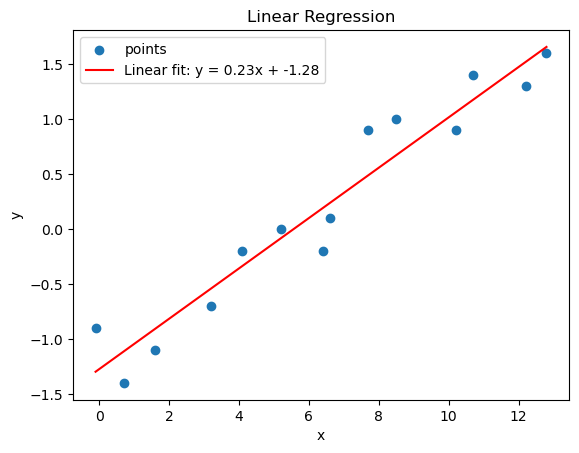

In [68]:
x = [-0.1,0.7,1.6,3.2,4.1,5.2,6.4,6.6,7.7,8.5,10.2, 10.7, 12.2, 12.8]
y = [-0.9,-1.4,-1.1,-0.7,-0.2,0.0,-0.2,0.1,0.9,1.0,0.9,1.4,1.3,1.6]

def liner_fit(x, y):
    N = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    beta1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2) 
    beta0 = y_mean - beta1 * x_mean

    return beta0, beta1

x = np.array([-0.1, 0.7, 1.6, 3.2, 4.1, 5.2, 6.4, 6.6, 7.7, 8.5, 10.2, 10.7, 12.2, 12.8])
y = np.array([-0.9, -1.4, -1.1, -0.7, -0.2, 0.0, -0.2, 0.1, 0.9, 1.0, 0.9, 1.4, 1.3, 1.6])

# Fit the data into the function
b,m = liner_fit(x,y)

plt.scatter(x,y,label='points')
plt.plot(x,m*x+b,'r-',label='Linear fit: y = {:.2f}x + {:.2f}'.format(m,b))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In this part of the assignment, we will explore the 3D plotting capabilities in Python. Specifically, we will generate
a 3D plot of an ice cream cone. The cone is 8 inches tall and has a base diameter of 4 inch. Furthermore, the top
of the ice-cream is a hemisphere of 4-inch diameter. We define the following parametric equations for the cone:
x = r cosθ, y = r sinθ, z = 4r
with θ ∈ [0, 2π] and r ∈ [0, 2]
Also, for the top of ice-cream which is hemisphere, the equations are:
x = r cosθ sinϕ, y = r sinθ sinϕ, z = 8 + r cosϕ
with θ ∈ [0, 2π] and phi ∈ [0, π] Generate the 3D mesh plot for the ice-cream cone described by the equations

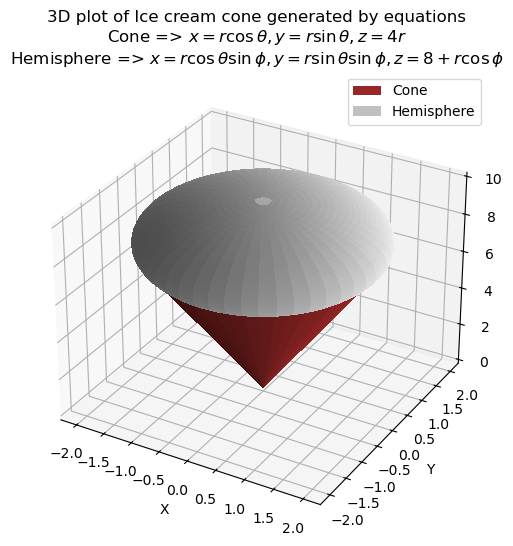

In [74]:
radius = np.linspace(0,2,100) #radius of cone
theta = np.linspace(0,2*np.pi,100) #theta for both cone and hemisphere
phi = np.linspace(0,np.pi,100) #phi for hemisphere
radius_hemi = 2

## Firstly we will draw the cone for this we need pairs of radius and theta
r_cone, theta_cone = np.meshgrid(radius,theta)

## now the equations of X,Y,Z will be given as
X = r_cone*np.cos(theta_cone)
Y = r_cone*np.sin(theta_cone)
Z = 4*r_cone

#plotting a cone
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X,Y,Z,color='brown',linewidth=0, antialiased=False, label = 'Cone' )
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

## Now we will draw the hemisphere
theta_hemi, phi_hemi = np.meshgrid(theta,phi)
r_hemi = 2

Xh = r_hemi*np.cos(theta_hemi)*np.sin(phi_hemi)
Yh = r_hemi*np.sin(theta_hemi)*np.sin(phi_hemi)
Zh = 8+r_hemi*np.cos(phi_hemi)
surf = ax.plot_surface(Xh,Yh,Zh,color='white',linewidth=0, antialiased=False, label='Hemisphere')

ax.set_title('3D plot of Ice cream cone generated by equations'+'\n'+r'Cone => $x=r \cos \theta, y=r \sin \theta, z=4 r$' +'\n'+
r'Hemisphere => $x=r \cos \theta \sin \phi, y=r \sin \theta \sin \phi, z=8+r \cos \phi$');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');
ax.legend();

##EX)

In [132]:
df = pd.DataFrame(data=np.array([[5,10,15,20],[3.8,4.3,3.0,0]]).T, columns = ['x','y'])
#to add the x^2 column
df['x2'] = df['x']**2
#to make the matrix X by adding the column for bias
X = np.append(np.ones(4).reshape(-1,1),df[['x','x2']].values,1)

## To calculate A and b (Solving using normal Equation)
A = np.matmul(X.T,X)
b = np.matmul(X.T,df['y'].values)

#to fit and find the values of B0, B1 and B2
B0,B1,B2 = np.linalg.solve(A,b)
print('The value of the B0, B1, and B2 are',np.round(B0,2),np.round(B1,2),np.round(B2,2))

The value of the B0, B1, and B2 are 1.57 0.62 -0.04


In [133]:
def predict(x,B0=B0,B1=B1,B2=B2):
    return B0+B1*x+B2*x**2

df['y_hat'] = df['x'].apply(lambda x:predict(x))

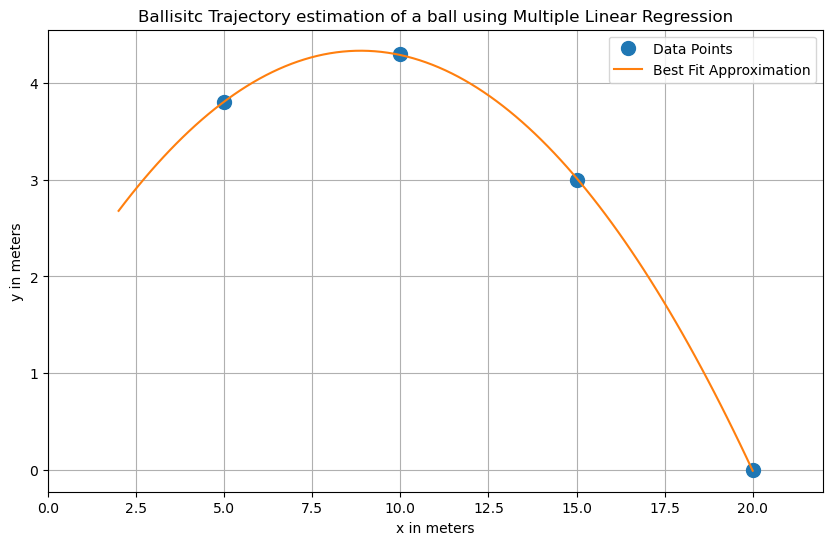

In [135]:
#To plot the trajectory
fig = plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'o',markersize=10,label='Data Points')

# to have a nice smooth best fit curve
dummy_x = np.linspace(2,20,100)
dummy_y = predict(dummy_x)
#dummy_y = [predict(val) for val in dummy_x]
plt.plot(dummy_x,dummy_y,label='Best Fit Approximation');

# to make plot nicer
plt.xlim([0,22]);
plt.xlabel('x in meters');
plt.ylabel('y in meters');
plt.title('Ballisitc Trajectory estimation of a ball using Multiple Linear Regression');
plt.legend();
plt.grid('on')

In [136]:
#now to find the value of y_0, v_0, theta_0

#values given from the data
g = 9.81
y_0 = B0
theta_0 = np.arctan(B1)
v_0 = np.sqrt(-g/(2*B2*np.cos(theta_0)**2))
print('The estimated values of y_0, theta_0, and v_0 are',np.round(y_0,2),np.round(np.rad2deg(theta_0),2),np.round(v_0,2))

The estimated values of y_0, theta_0, and v_0 are 1.57 31.84 13.94


In [137]:
#To get the relative error
def give_relative_error(measured,real):
    return np.round(np.absolute(measured-real)/real,3)

print('The relative error in y_0, theta_0 and v_0 are',give_relative_error(y_0,1.8),\
      give_relative_error(np.rad2deg(theta_0),30),give_relative_error(v_0,14),'respectively')

The relative error in y_0, theta_0 and v_0 are 0.125 0.061 0.005 respectively
